# Capstone Project: ByDefault-Prediction of Credit Card Fraud

# Data Source and Dataset Description:

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where 492 frauds out of 284,807 transactions were identified.

# Loading of Dataset

In [1]:
# Importing Important Libraries:

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_data = pd.read_csv(r'C:\Users\user\Documents\Others\Home\Trainings\Data_Science_Course\Knowledge_Hut_BootCamp\Data Scientist Bootcamp_capstone_project\final_project_docs\creditcard_data.csv')

In [3]:
df_data.shape

(284807, 31)

In [4]:
# Checking for class distribution
class_counts = df_data['Class'].value_counts()
print(class_counts)

Class
0    284315
1       492
Name: count, dtype: int64


In [5]:
# X, y splitting to allow handle imbalanced classes:
X = df_data.drop('Class', axis=1)  # Features
y = df_data['Class']  # Target variable

In [6]:
# Installing imblearn from imbalanced-learn
!pip install imbalanced-learn

In [7]:
# Just in case the above installation did not whork
!pip install -U imbalanced-learn

In [8]:
# Installing sklearn
!pip install sklearn

In [9]:
# Checking for libraries availability:
import sklearn
import imblearn
print(sklearn.__version__)
print(imblearn.__version__)

1.3.0
0.11.0


In [10]:
# Importing SMOTE: for Synthetic Minority Over-sampling Technique to Handle the Imbalanced Dataset
# (Minority Class)
from imblearn.over_sampling import SMOTE

Synthetic Minority Over-sampling Technique (SMOTE) to balance the class distribution

In [11]:
# Handling imbalanced dataset df['Class']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Recreate DataFrame: After applying SMOTE, a new resampled data in X_resampled and y_resampled created, from which a new DataFrame is created using the concatenate method

In [12]:
df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Class'])], axis=1)


In [13]:
df.shape

(568630, 31)

In [14]:
# Checking for class distribution after applying SMOTE in the new created DataFrame:
class_counts = df['Class'].value_counts()
print(class_counts)

Class
0    284315
1    284315
Name: count, dtype: int64


In [15]:
# Understanding DataFrame Columns:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [16]:
import pandas as pd

# Assuming you have your DataFrame loaded as 'df'
# You can replace 'df' with the actual variable name of your DataFrame.

# Count the number of columns
num_columns = df.shape[1]

# Display the number of columns
print("Number of columns:", num_columns)

Number of columns: 31


In [17]:
# !pip install pydantic==1.8.2


In [18]:
# !pip install pandas_profiling
# !pip install pandas-profiling --upgrade
!pip install pandas-data-eda

ERROR: Could not find a version that satisfies the requirement pandas-data-eda (from versions: none)
ERROR: No matching distribution found for pandas-data-eda


In [19]:
# from pandas_profiling import ProfileReport

In [20]:
# DataFrame Shape and Missing values

print(df.shape)
round((df.isnull().sum() / len(df))*100,2)

(568630, 31)


Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [21]:
# Picking several random samples of the DataFrame

df.sample(10)

Time        V1        V2        V3        V4        V5  \
248366  153913.000000  2.018620 -0.052798 -1.098035  0.495529 -0.083113   
331092   12942.263893 -3.176818  4.692907 -8.588073  5.831350 -4.793276   
12024    20814.000000 -0.324384  0.097473  1.922027 -0.776814 -0.566865   
31475    36381.000000  1.104794 -0.236375  0.856632  1.541194 -0.319520   
8012     10995.000000  1.245805 -0.043563  0.861962  0.333656 -0.891480   
345505  102639.039003 -4.662323  3.621273 -6.408195  7.282376 -3.198127   
187554  127584.000000  1.841410  0.438544 -0.349244  4.051434  0.061213   
366106  148034.452530 -0.456293  3.940547 -5.871637  5.314400  1.472042   
568134   12135.571195 -4.554914  3.365502 -6.253559  6.285010 -2.252491   
255545  157278.000000  1.984787 -1.937036  0.486613 -1.245536 -2.518536   

              V6        V7        V8        V9  ...       V21       V22  \
248366 -1.136409  0.174046 -0.369890  0.331716  ...  0.166814  0.596243   
331092 -1.601235 -8.631922  2.186822 -1.862626  ...  1.924120  0.243330   
12024   0.367600 -0.509473  0.420768  2.576779  ... -0.004698  0.330007   
31475   1.078738 -0.526513  0.331363  1.305213  ... -0.459806 -0.881057   
8012   -0.857035 -0.477756 -0.168757  1.830479  ... -0.073473  0.019158   
345505 -1.288457 -7.290174  2.898284 -3.145896  ...  1.500081  1.204356   
187554 -0.278001  0.166380 -0.128410 -0.695763  ...  0.120975  0.512147   
366106 -1.999926 -1.367667  0.496827 -3.704451  ...  0.349207 -0.811327   
568134 -1.652636 -4.876474  1.113039 -1.658347  ...  0.750941  0.261369   
255545 -0.544524 -1.819244 -0.074875 -0.659777  ...  0.174011  0.889289   

             V23       V24       V25       V26       V27       V28  \
248366  0.093455  0.050037 -0.015006  0.384258 -0.054110 -0.056515   
331092  0.644475 -0.463076 -1.361006  0.262593  0.308757  0.278923   
12024  -0.087192 -0.411896 -0.537819 -0.621847  0.209949  0.141275   
31475  -0.035250 -0.770545  0.531323 -0.459011  0.087071  0.023200   
8012   -0.008037  0.385469  0.185571  1.033308 -0.093438  0.004481   
345505 -0.425868 -0.206185 -1.301994  0.097915  0.059086 -0.561500   
187554  0.123190  0.402777  0.063381  0.072321 -0.024455 -0.043728   
366106 -0.318917 -0.168431  0.359044  0.086098  0.749389  0.467033   
568134  0.601269 -0.314767 -0.672863  0.020178 -1.067822  0.712486   
255545  0.218248  0.492384 -0.584599 -0.135040  0.070319 -0.000205   

            Amount  Class  
248366   21.980000      0  
331092   45.783483      1  
12024    11.850000      0  
31475    28.140000      0  
8012     15.950000      0  
345505    5.168272      1  
187554   22.710000      0  
366106    0.410381      1  
568134   28.014726      1  
255545  120.000000      0  

[10 rows x 31 columns]

In [22]:
# Visualizing the first 5 values of the DataFrame:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [23]:
# Visualizing the Last 5 values of the DataFrame:
df.tail()

Time        V1        V2        V3        V4        V5  \
568625  144838.659385 -6.379157  1.672637 -5.885670  2.068340 -0.668576   
568626   65965.011763 -2.479028  0.958932 -1.782249  1.541783 -1.191990   
568627   34592.129093 -1.799894  2.368957 -2.673997  1.705968 -1.355923   
568628  129683.002907  0.255234  2.432041 -5.388252  3.793925 -0.230814   
568629   91471.277869 -4.453646  3.210469 -5.294410  1.449911 -1.264653   

              V6        V7        V8        V9  ...       V21       V22  \
568625 -3.336450 -4.995823  2.632847 -2.275158  ...  0.641337 -0.249308   
568626 -0.466794 -1.957161  0.312580 -0.433956  ...  0.351983  0.208869   
568627 -1.121788 -2.057832 -1.677459 -0.659287  ...  1.473371 -0.581778   
568628 -1.382725 -1.572929  0.748305 -1.600633  ...  0.316760 -0.036858   
568629 -0.493626 -3.130644 -4.165957  0.998760  ...  4.414468 -1.065864   

             V23       V24       V25       V26       V27       V28  \
568625 -2.311290 -0.159402  1.190079 -0.258067  0.777265 -0.728919   
568626 -0.235986 -0.404446  0.220454  0.685263 -0.890346  0.598736   
568627 -0.013899 -0.144597  0.120315  0.242272 -0.121166 -0.534238   
568628  0.182968  0.190701 -0.339250 -0.272824  0.315507 -0.091005   
568629  0.798149  0.299668  0.064660 -0.446730 -0.363233  1.018147   

            Amount  Class  
568625    7.334751      1  
568626   74.507571      1  
568627  102.486823      1  
568628   58.346854      1  
568629  143.872749      1  

[5 rows x 31 columns]

# Conducting Exploratory Data Analysis [EDA]

In [24]:
# Importing the library:
import sweetviz as sv

In [25]:
report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)


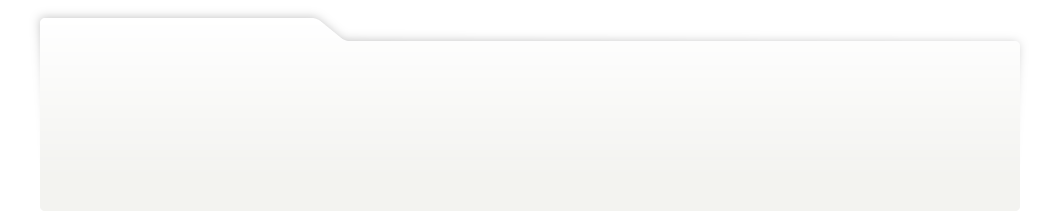
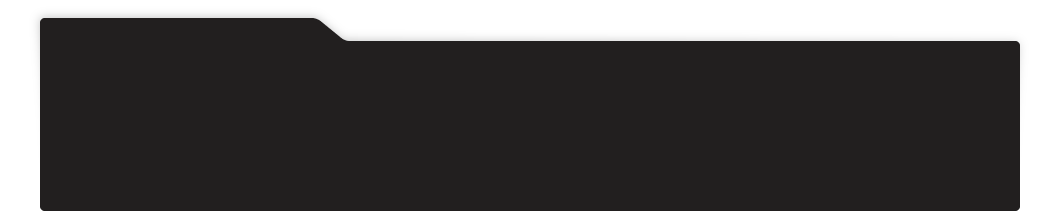
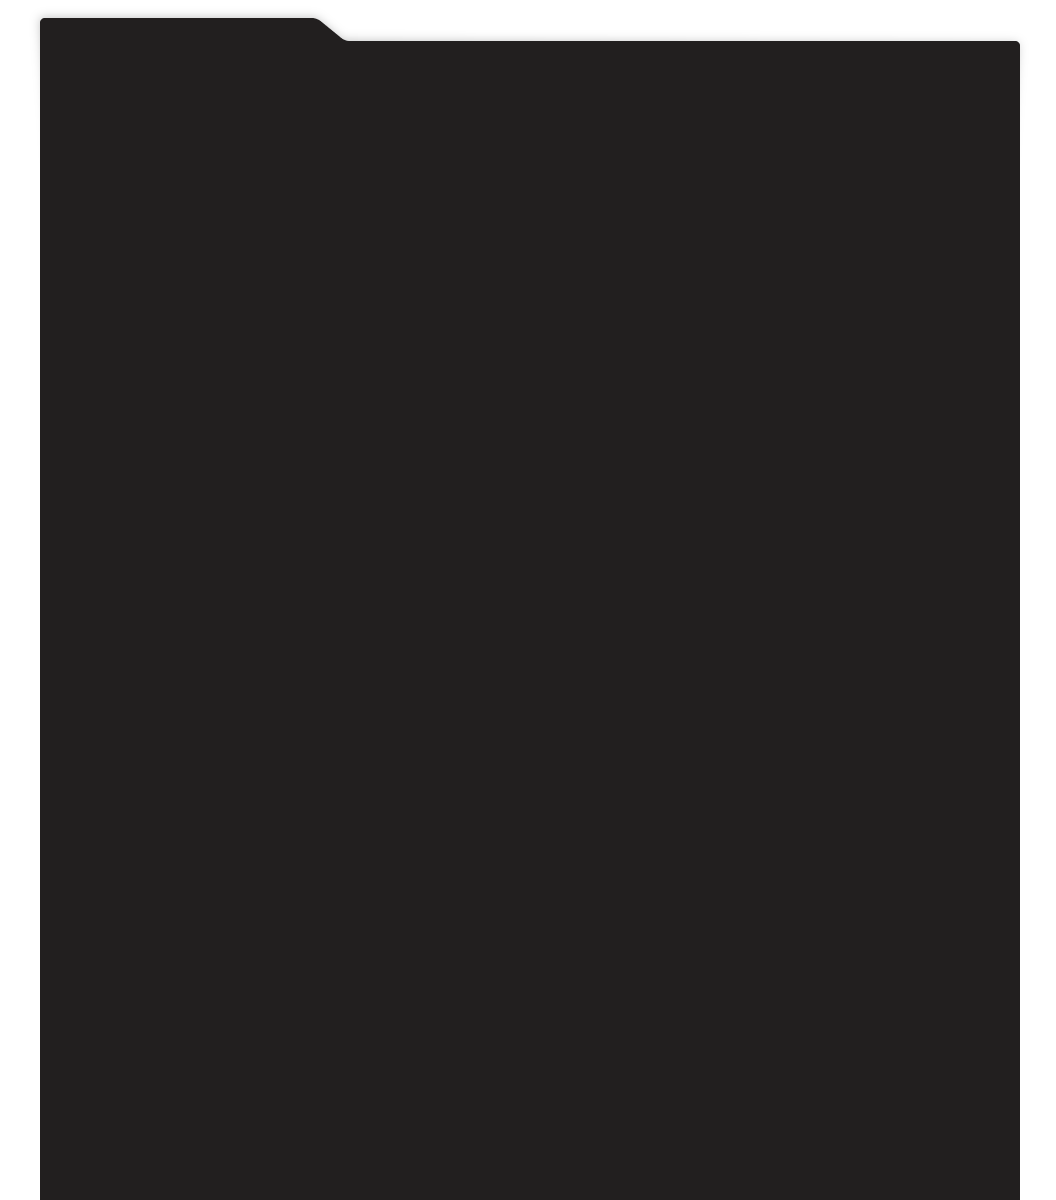
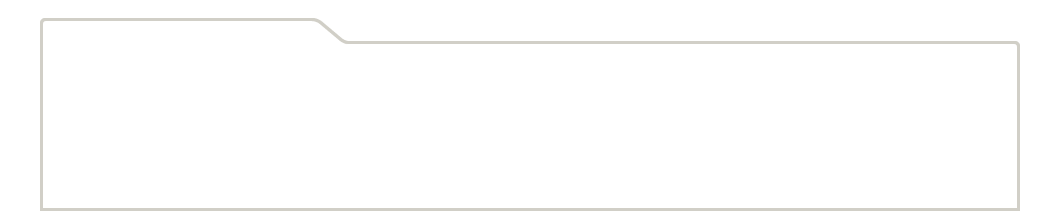
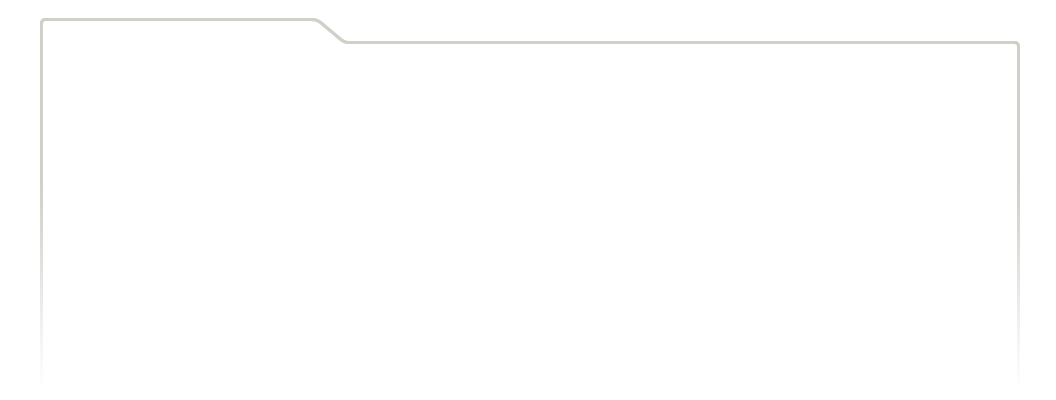
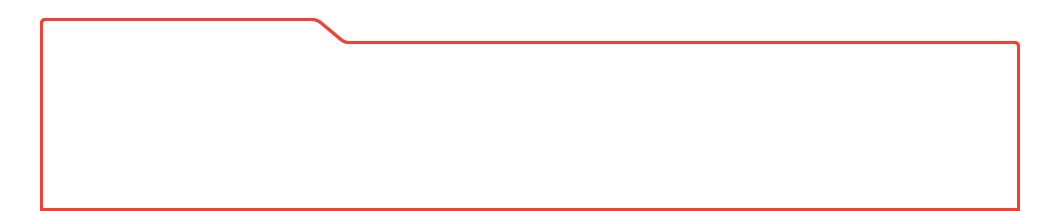
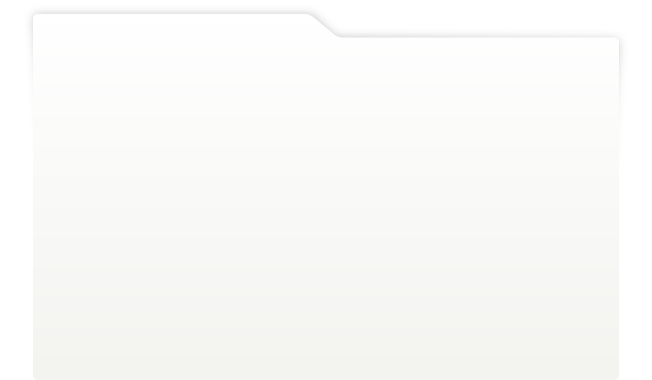
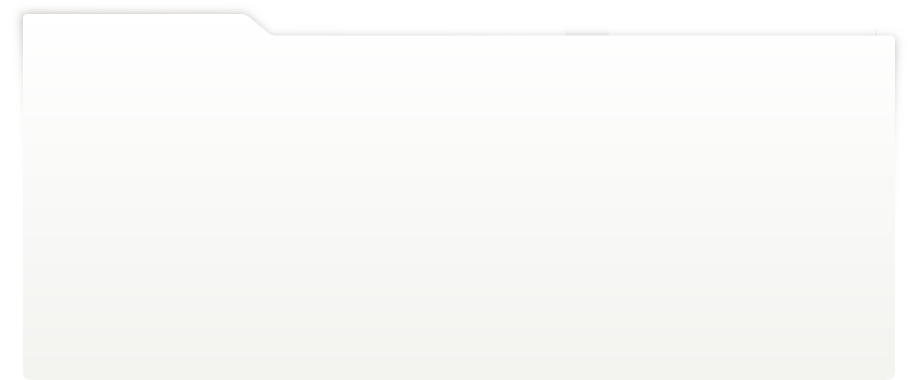
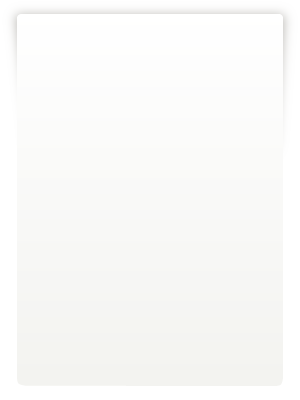
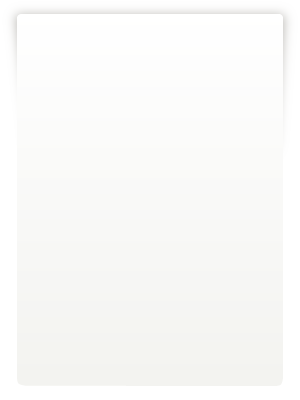
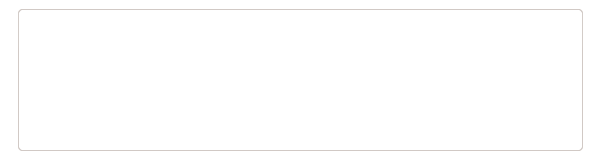
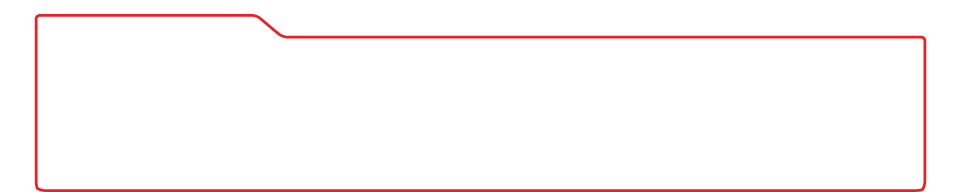
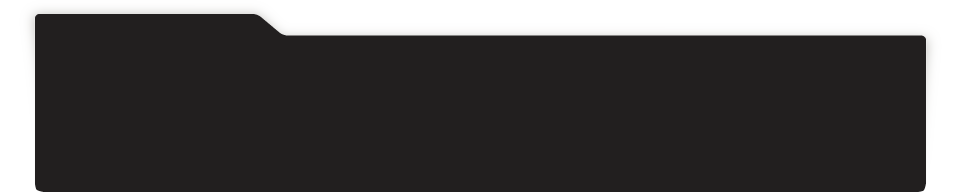
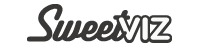
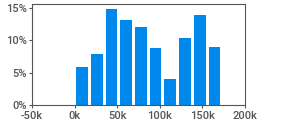
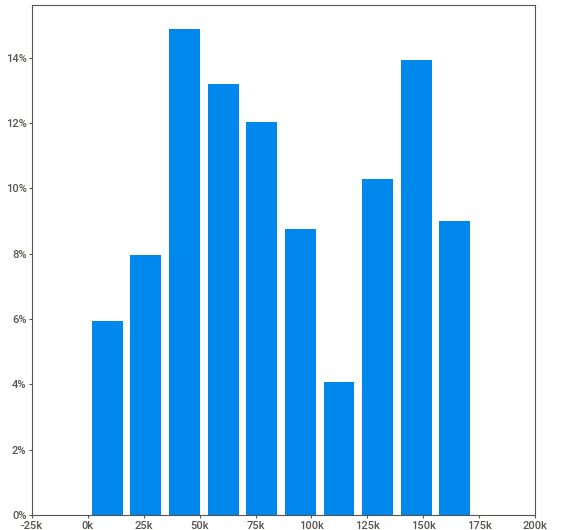
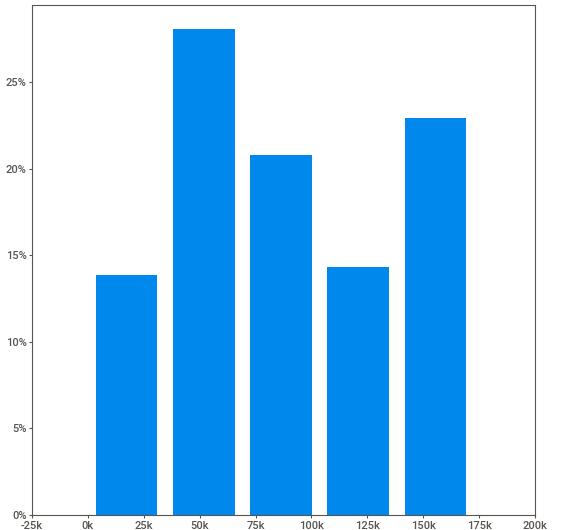
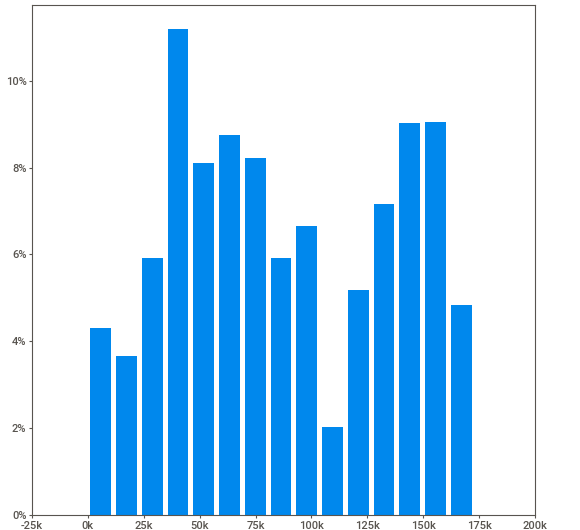
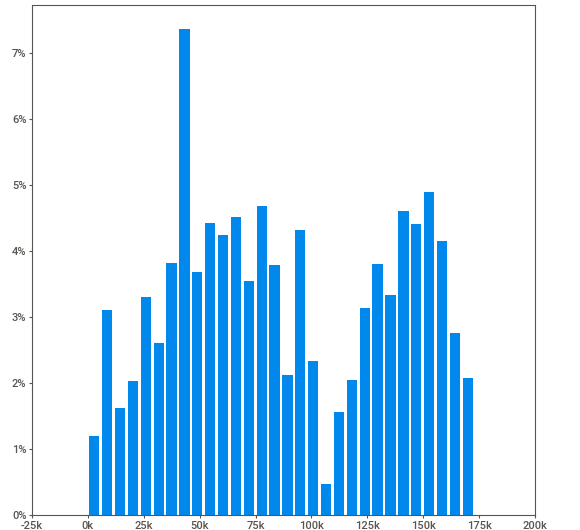
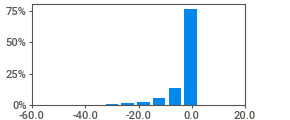
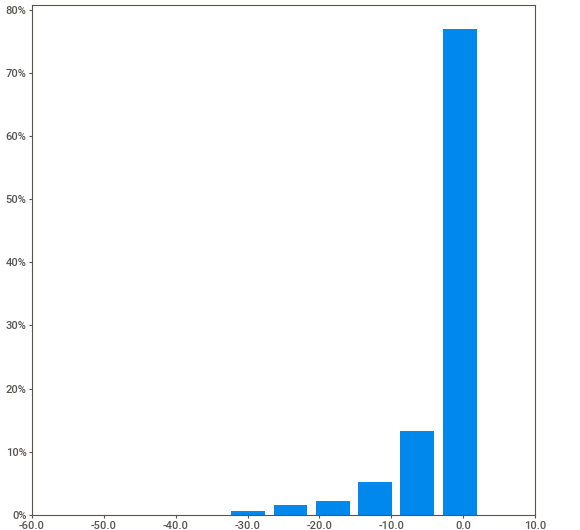
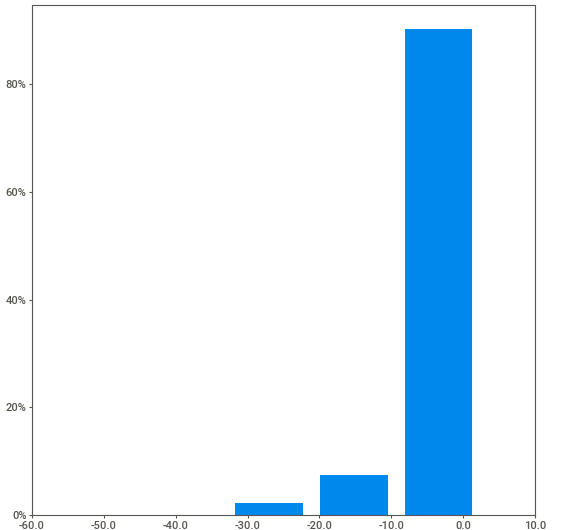
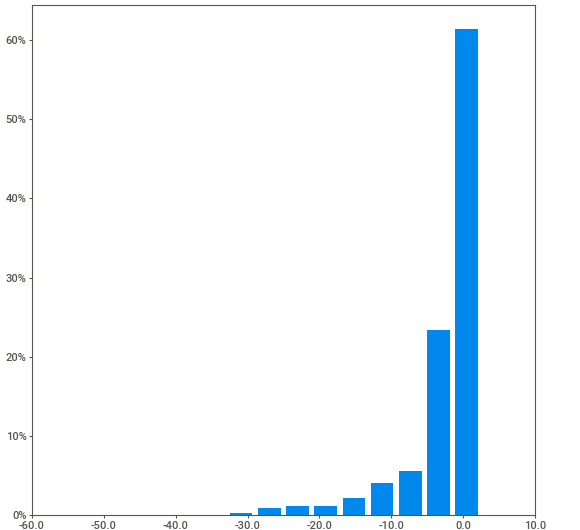
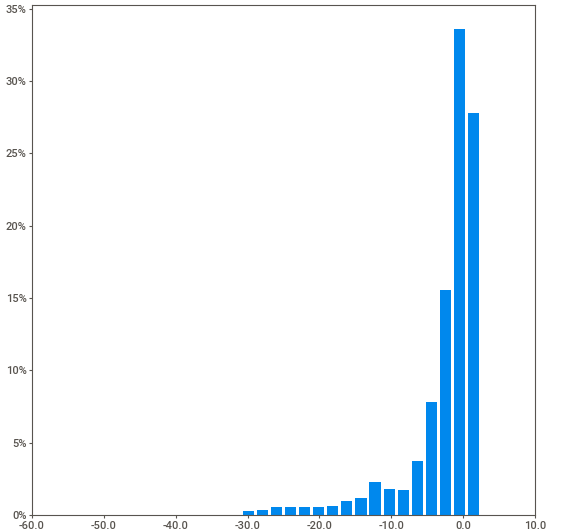
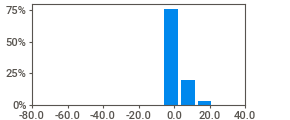
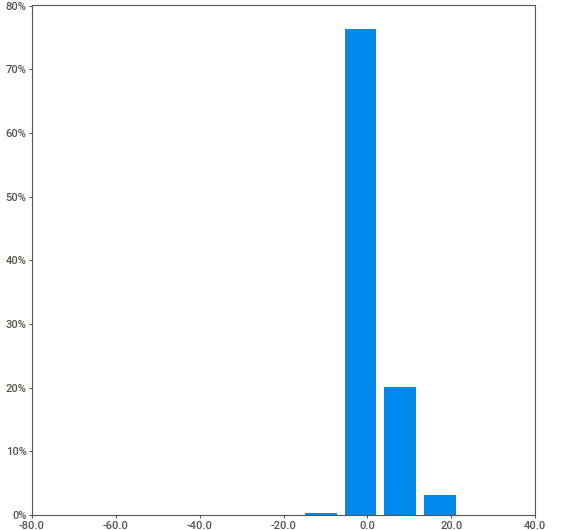
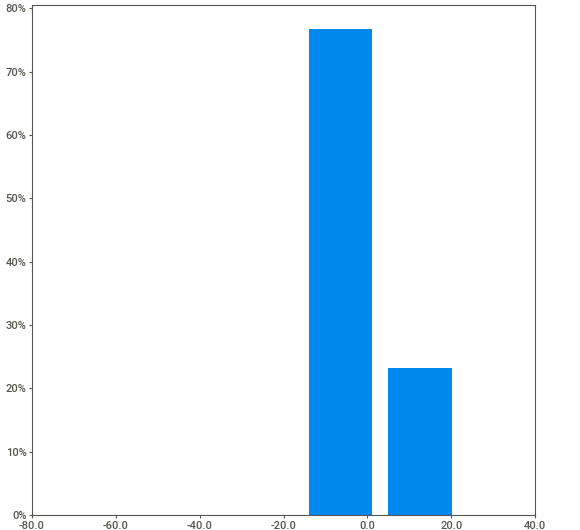
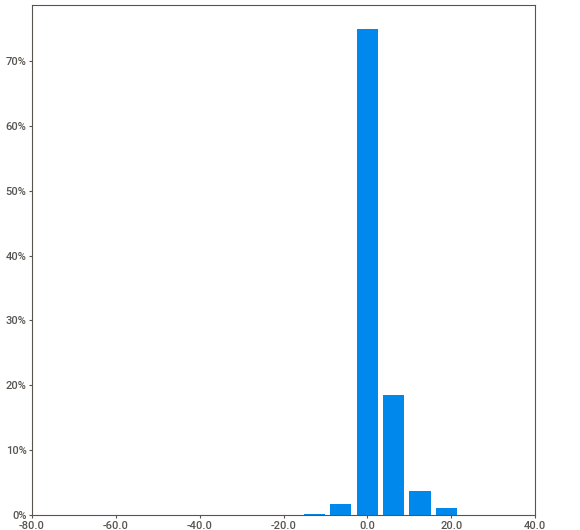
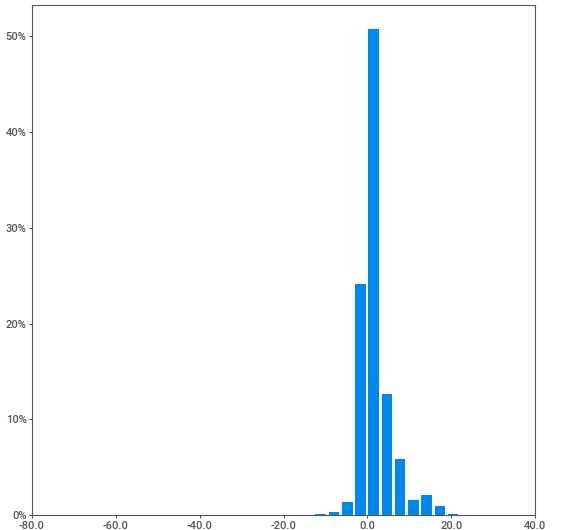
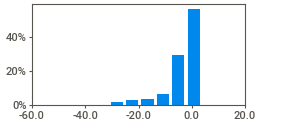
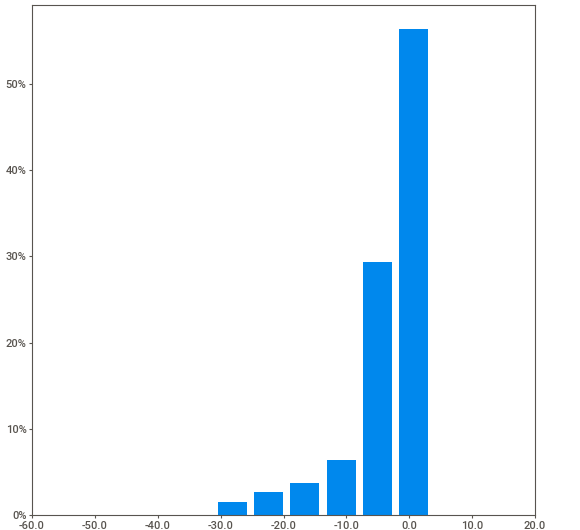
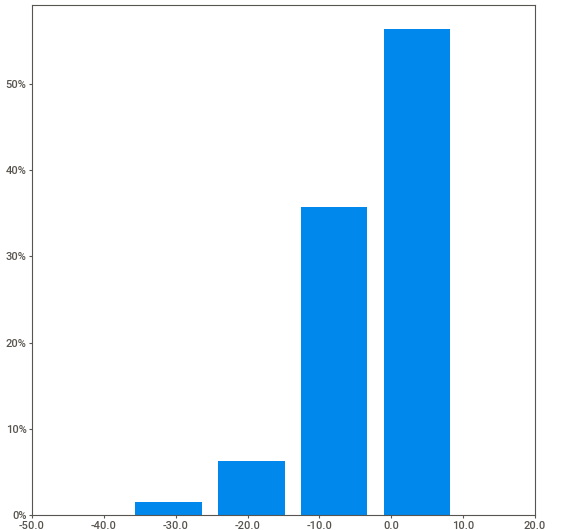
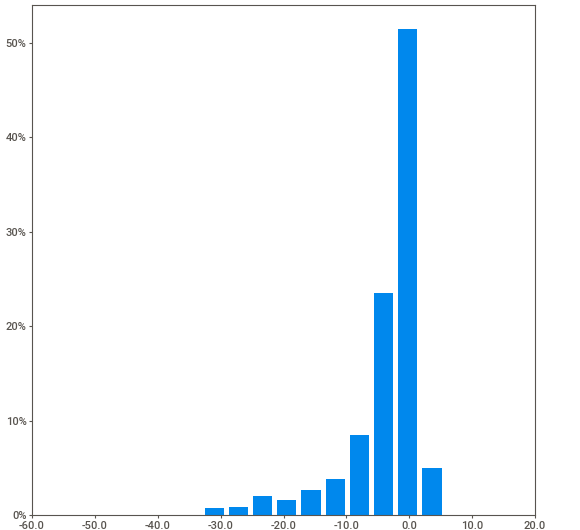
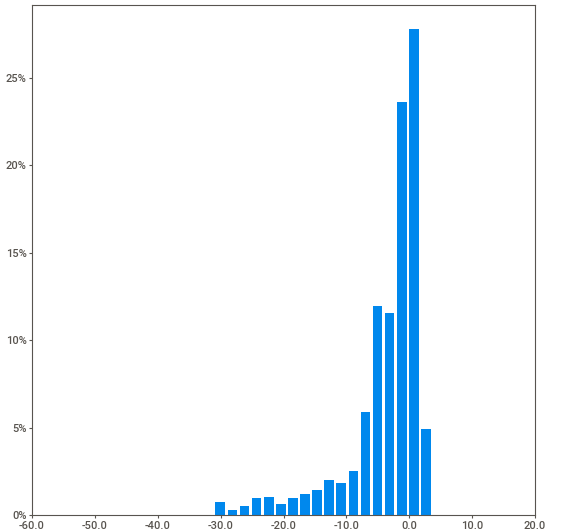
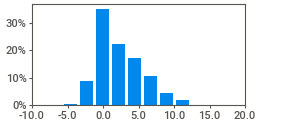
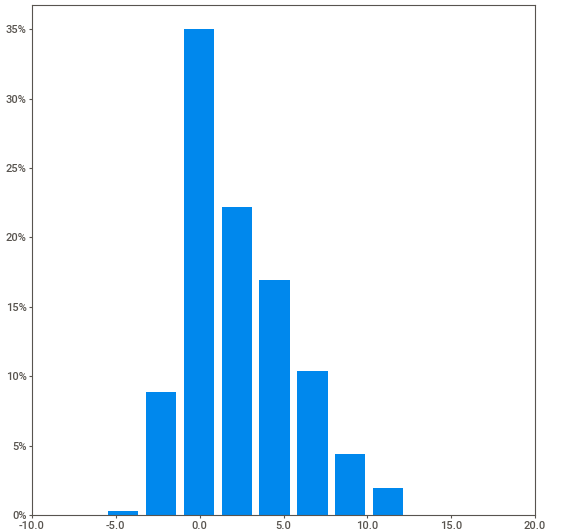
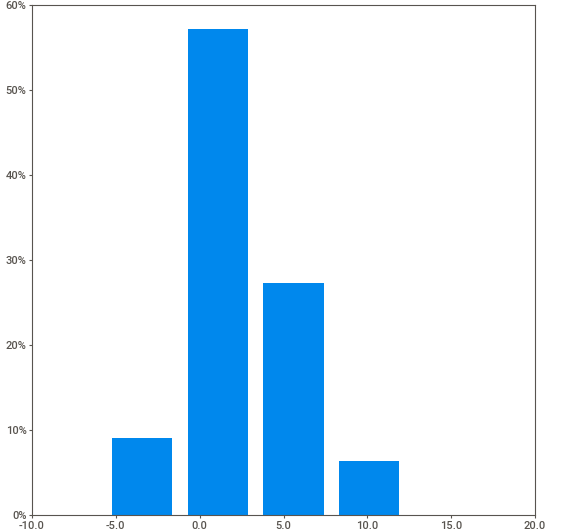
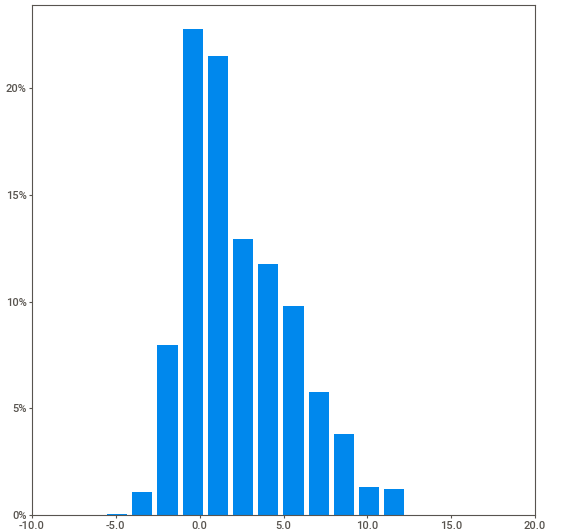
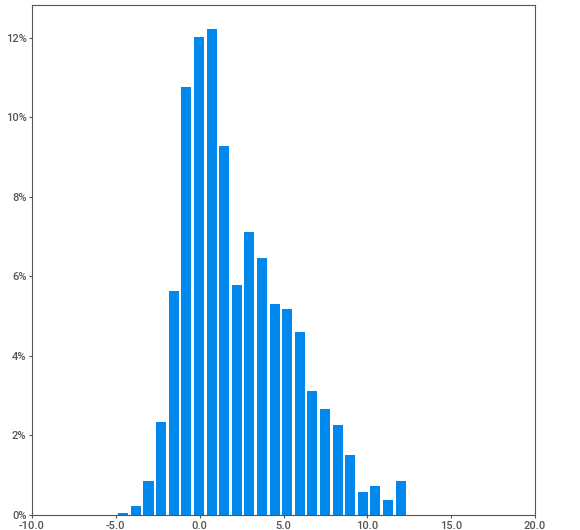
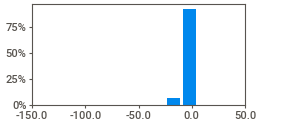
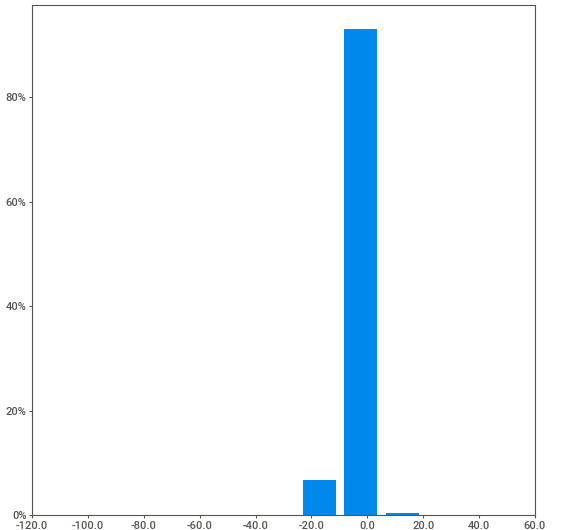
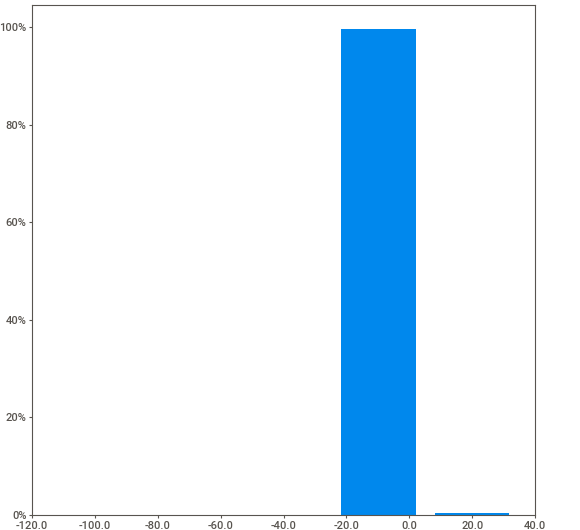
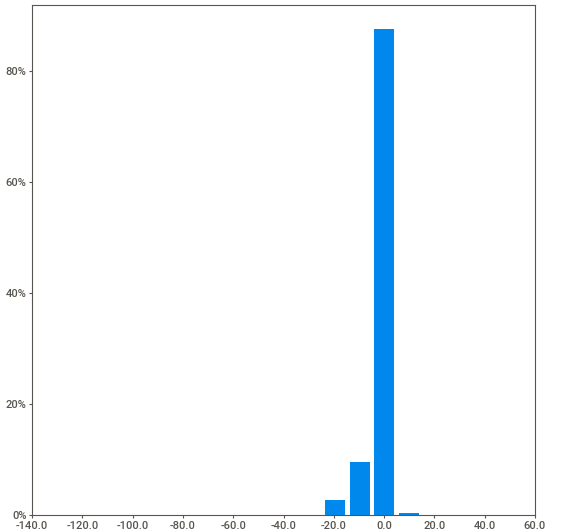
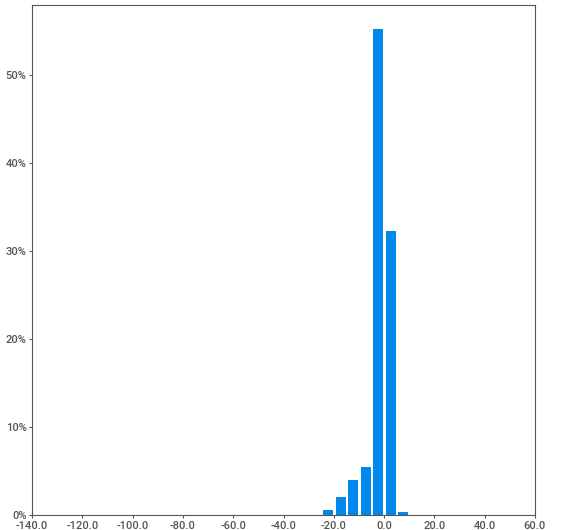
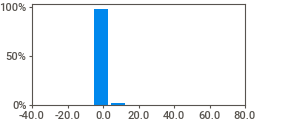
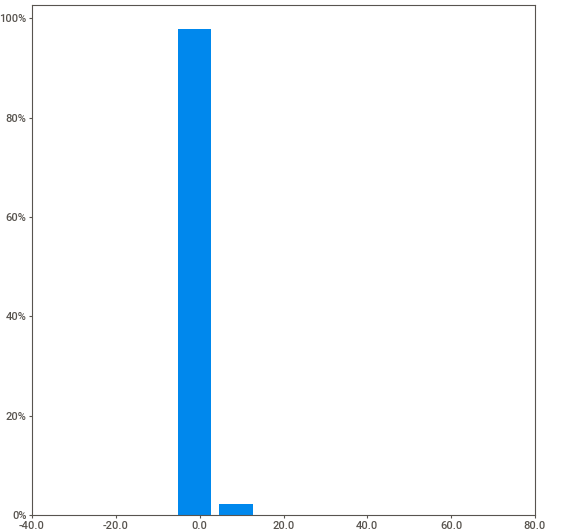
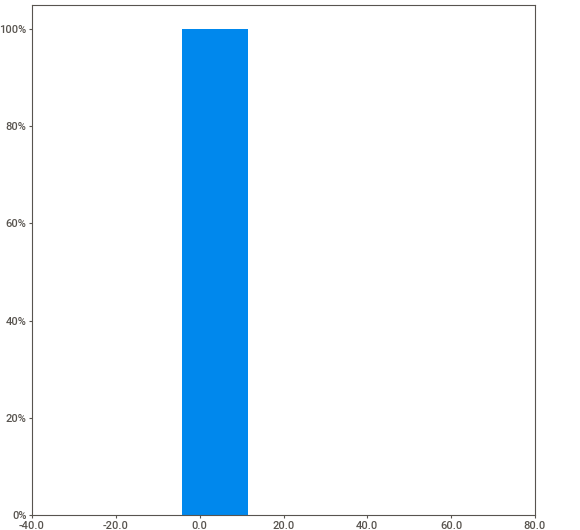
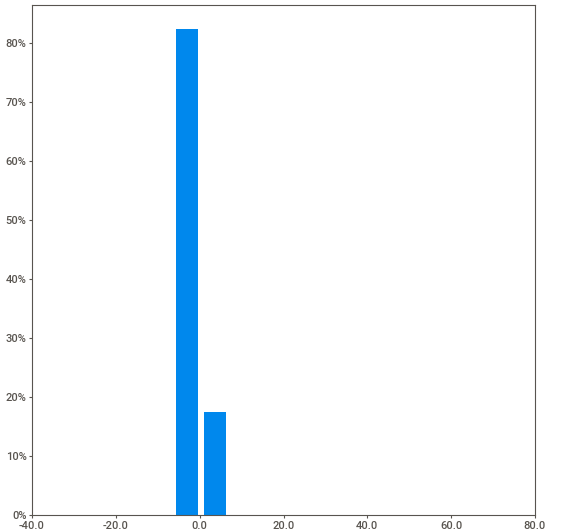
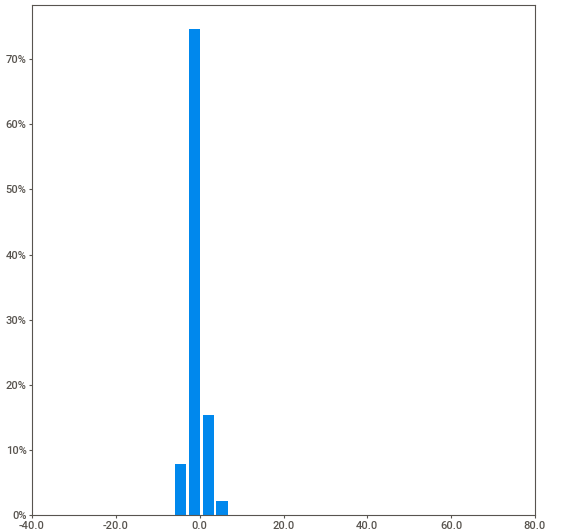
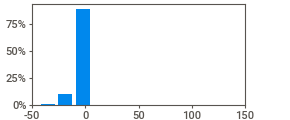
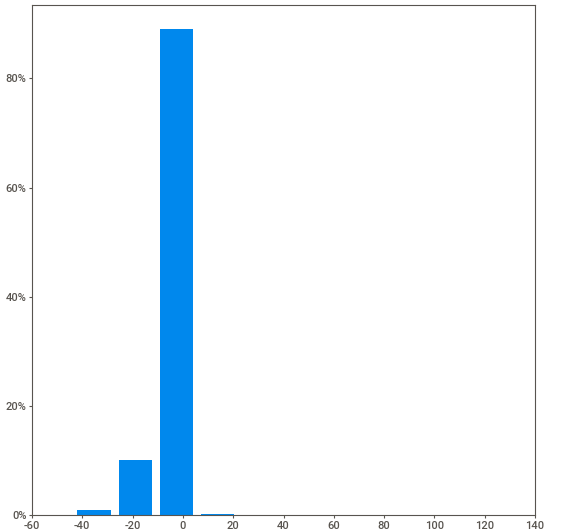
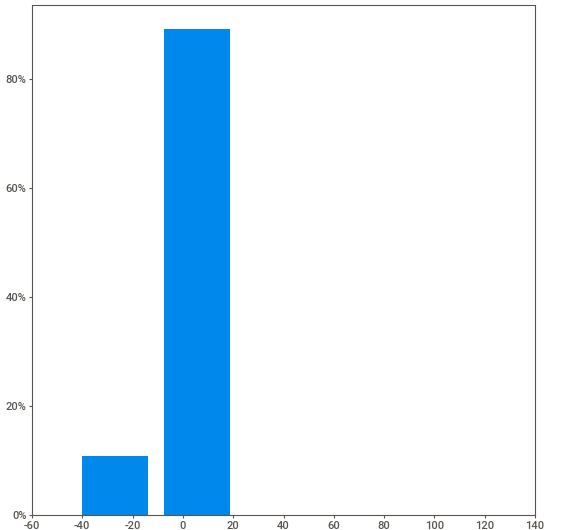
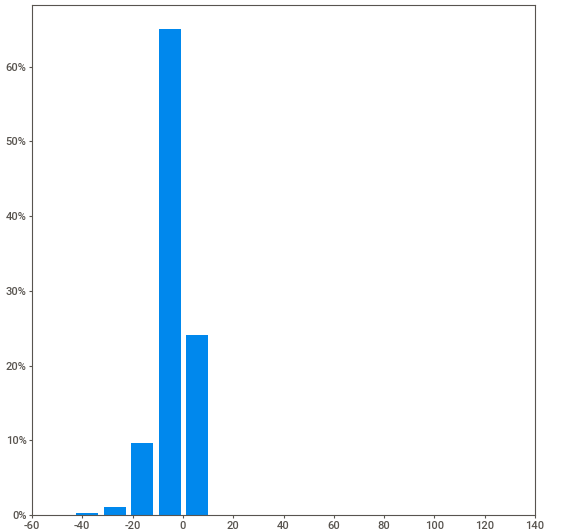
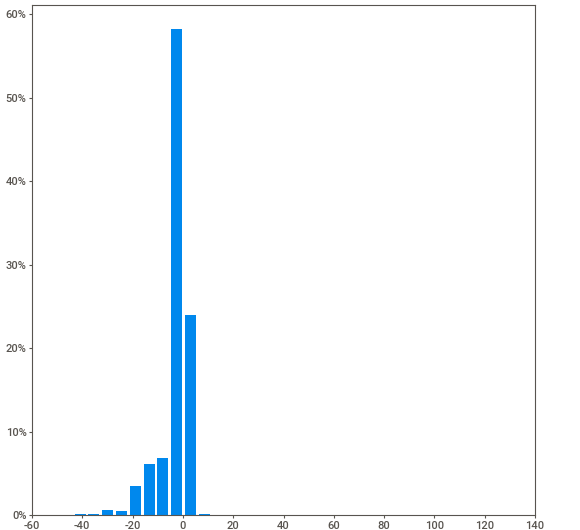
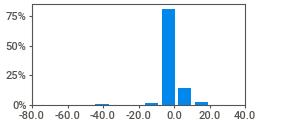
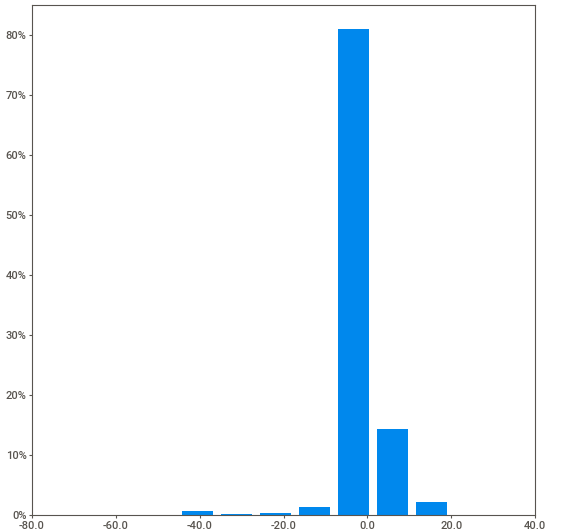
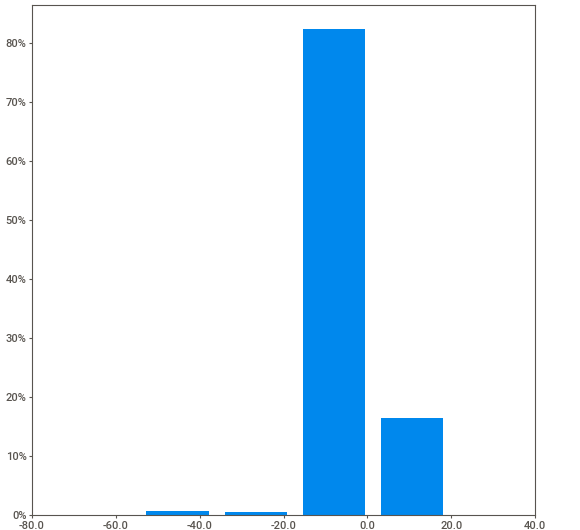
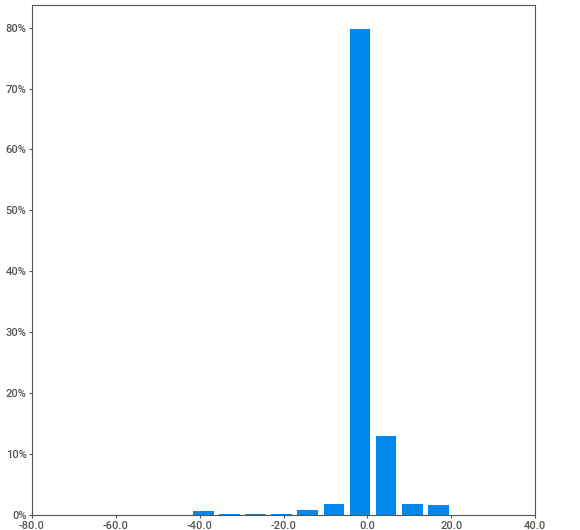
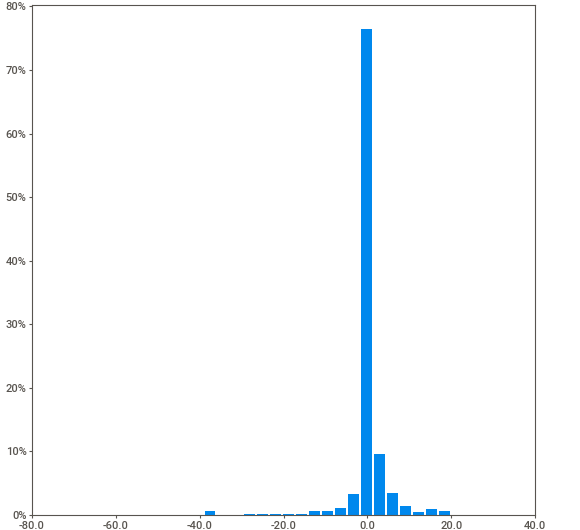
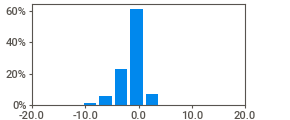
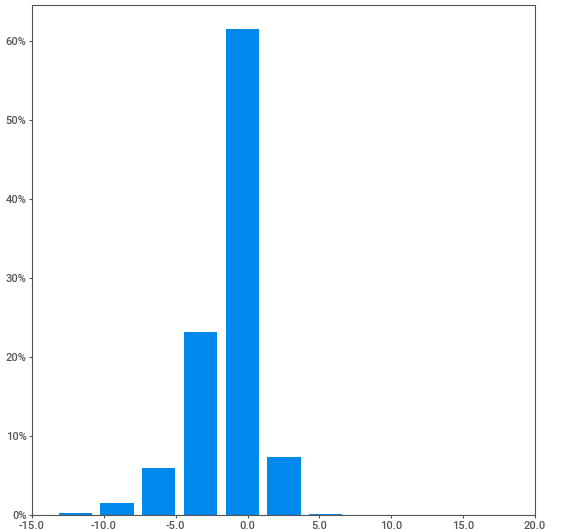
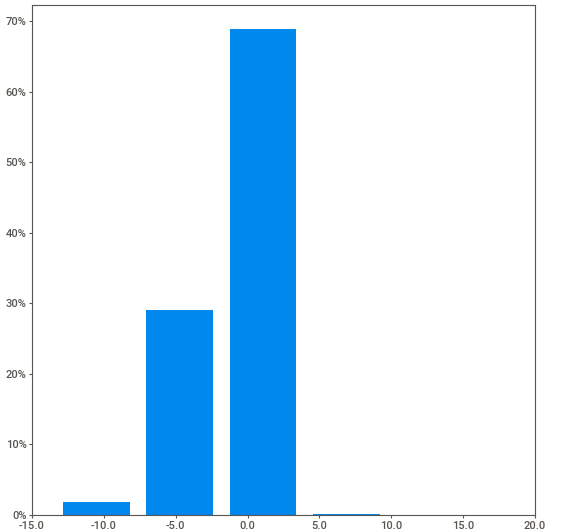
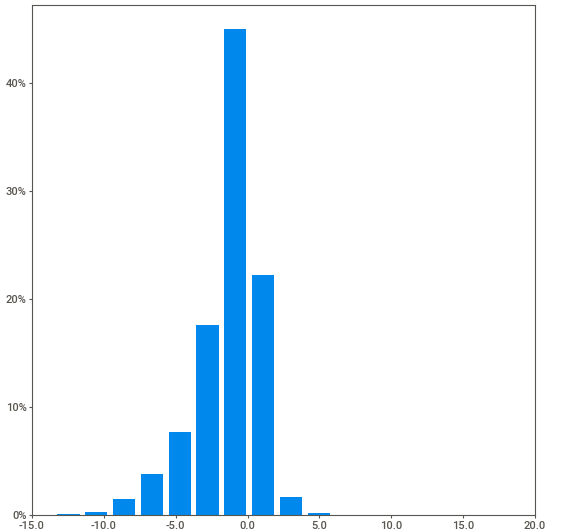
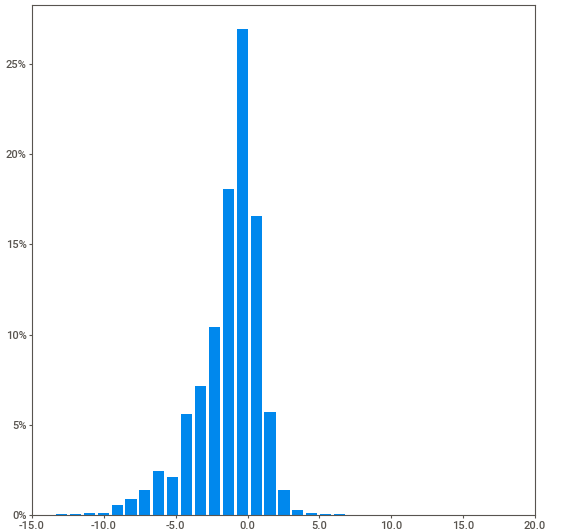
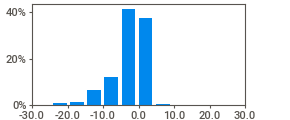
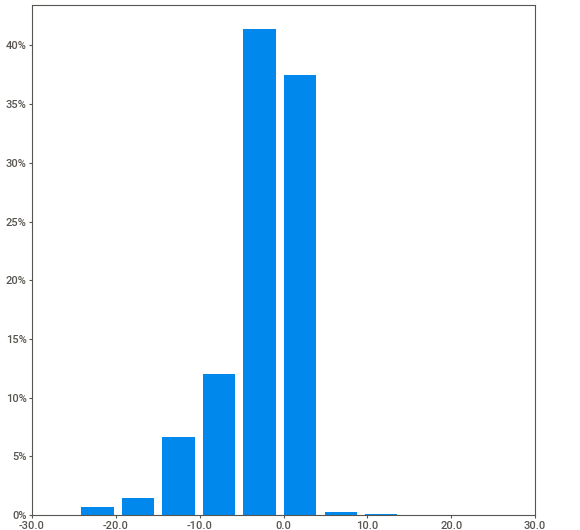
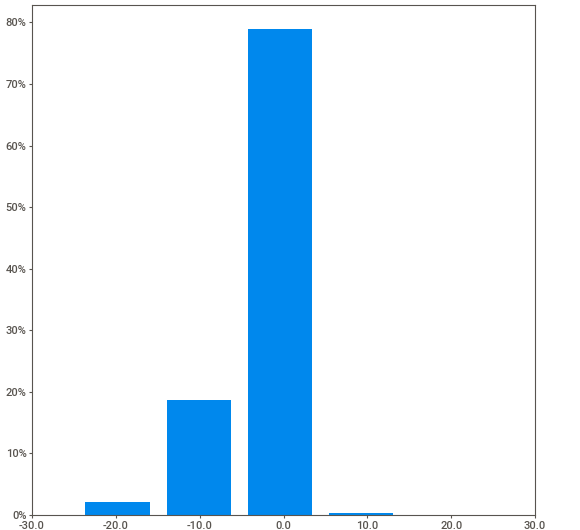
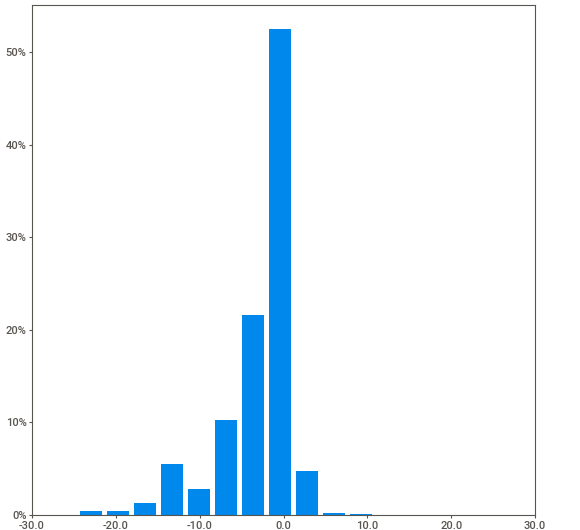
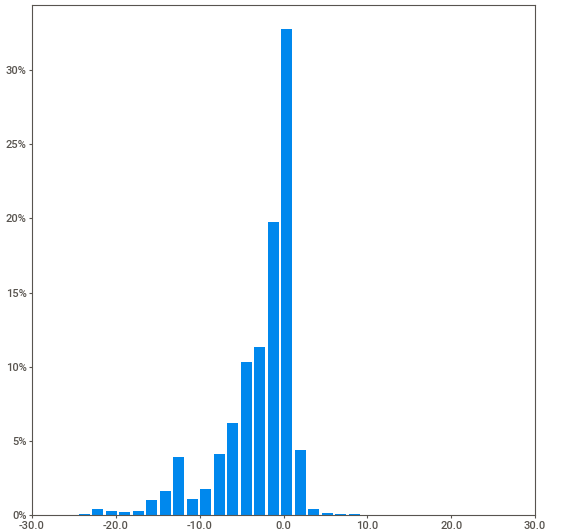
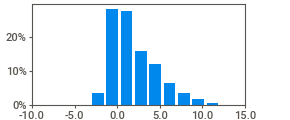
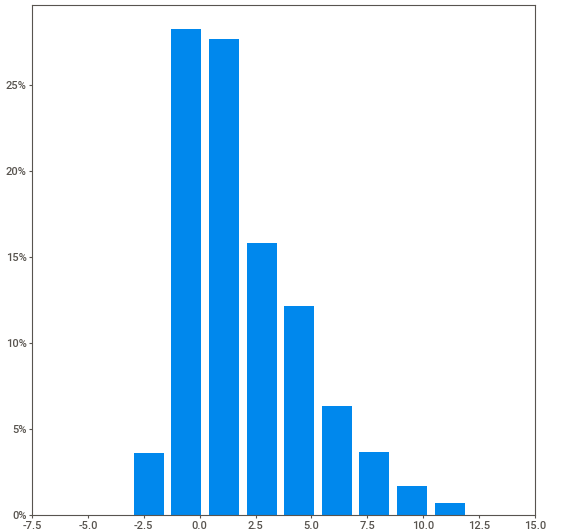
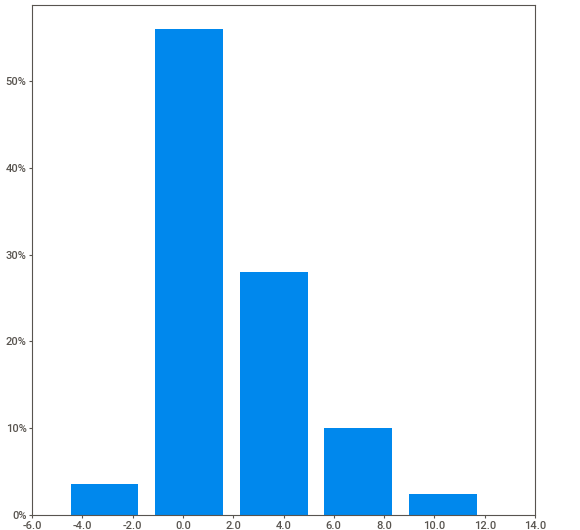
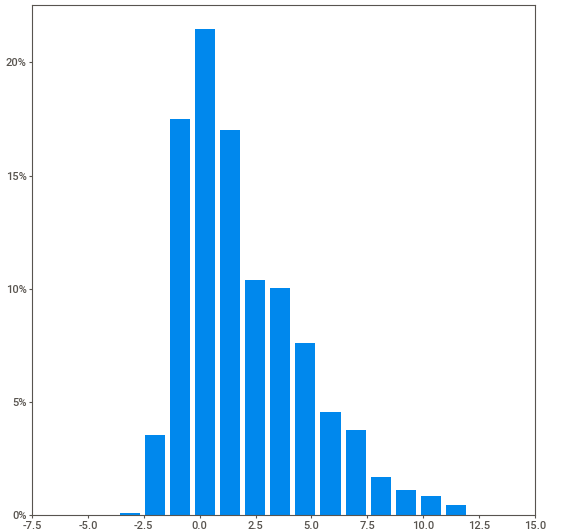
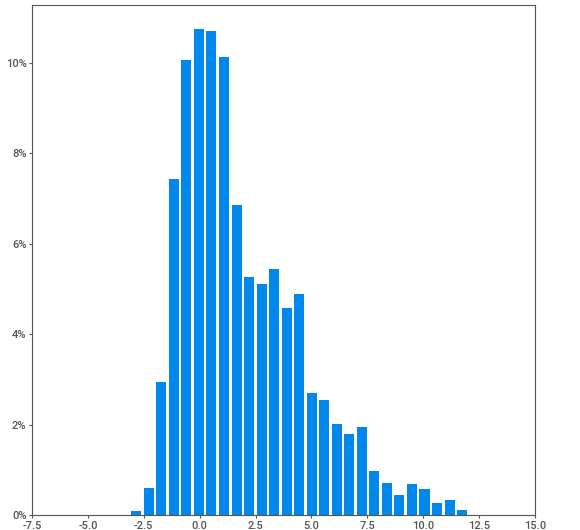
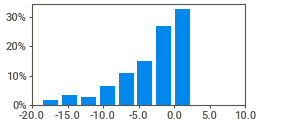
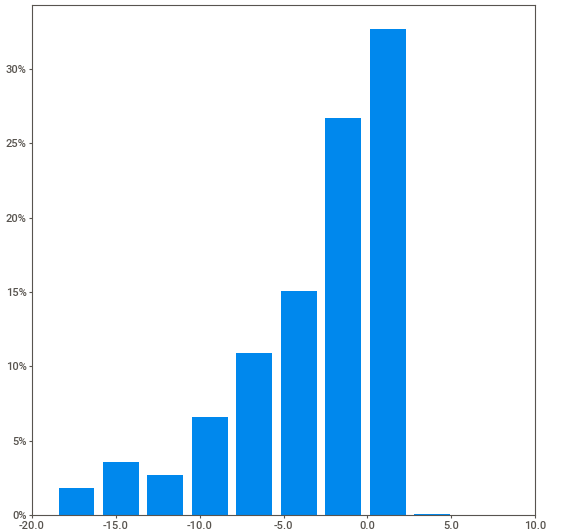
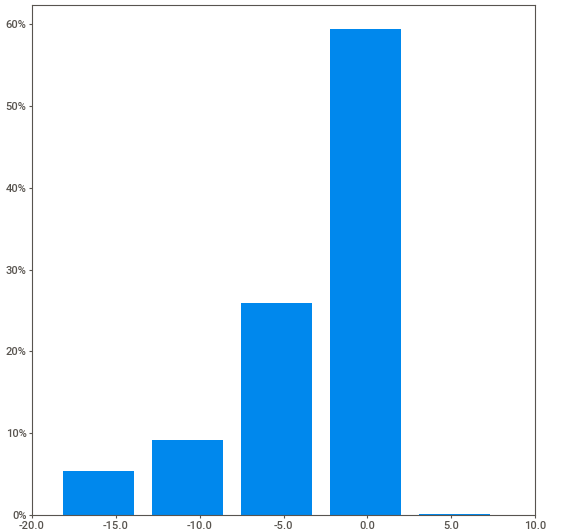
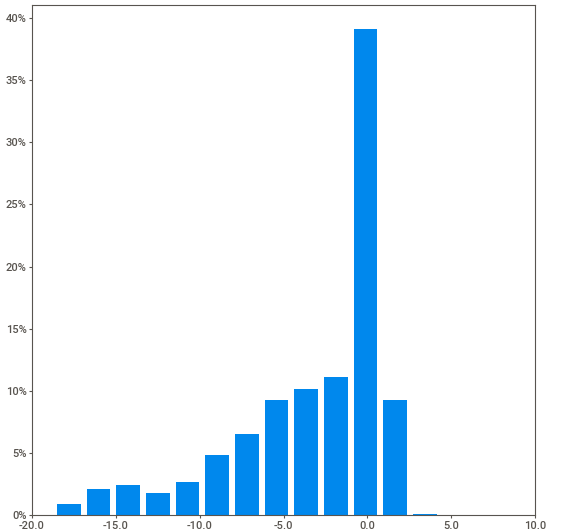
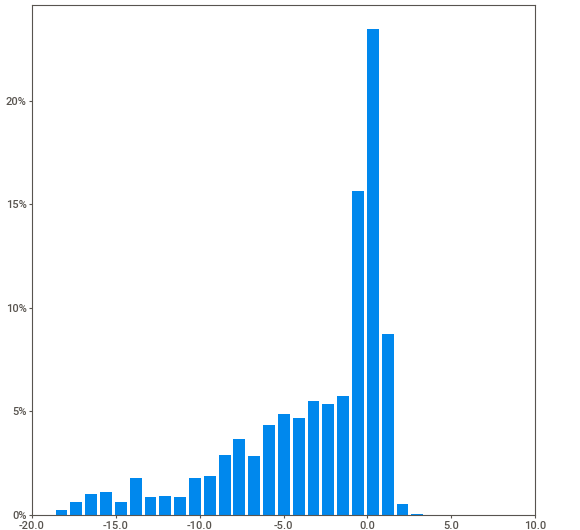
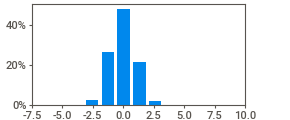
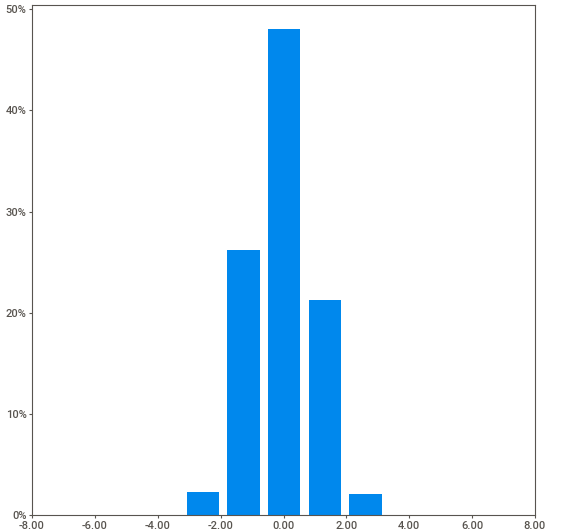
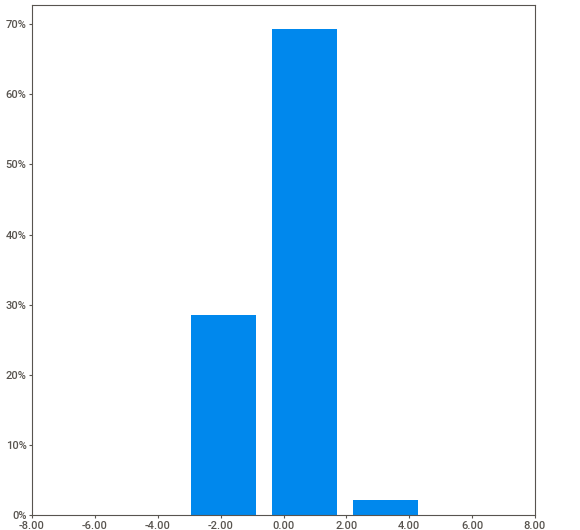
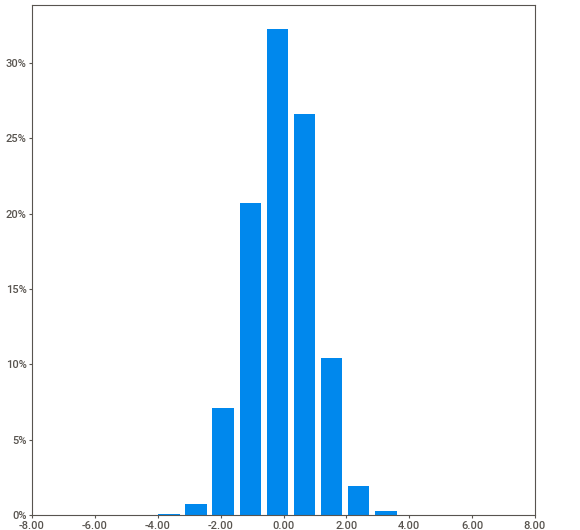
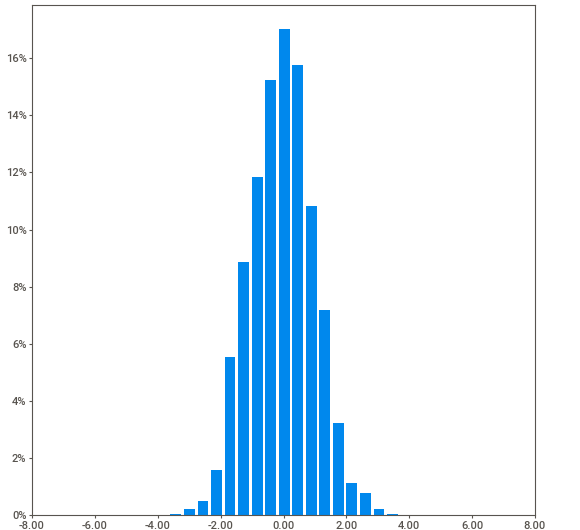
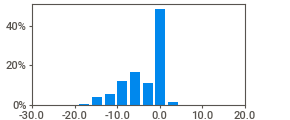
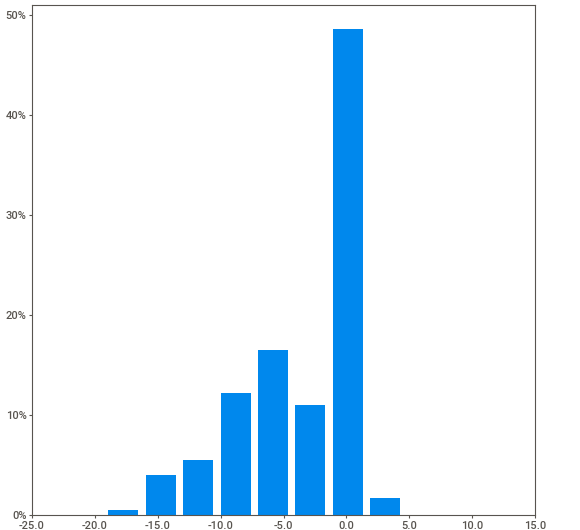
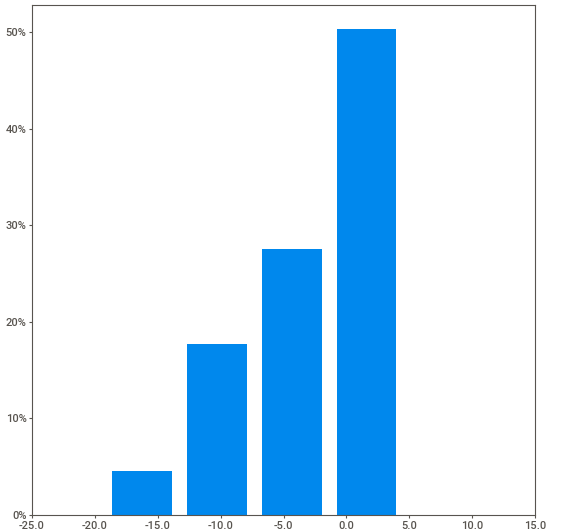
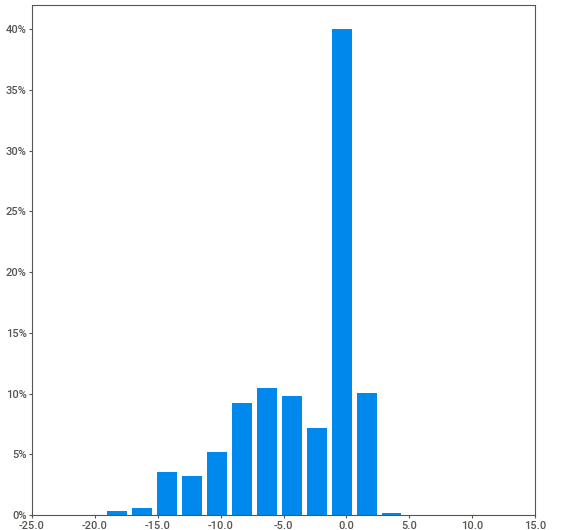
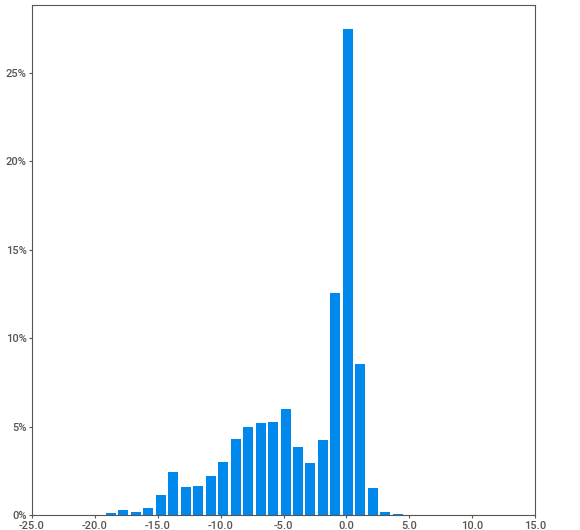
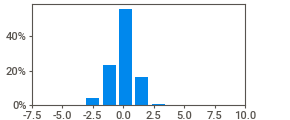
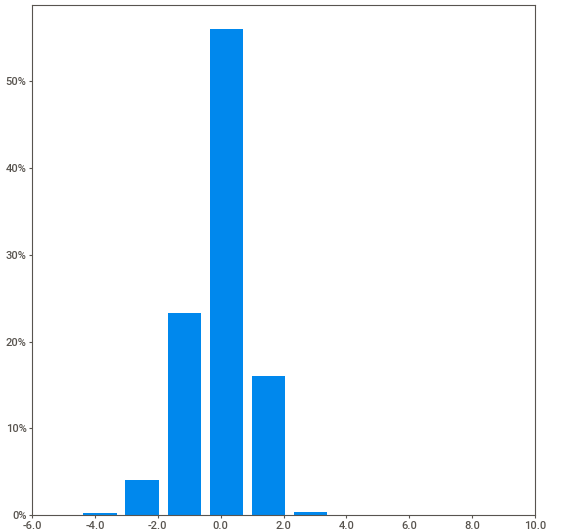
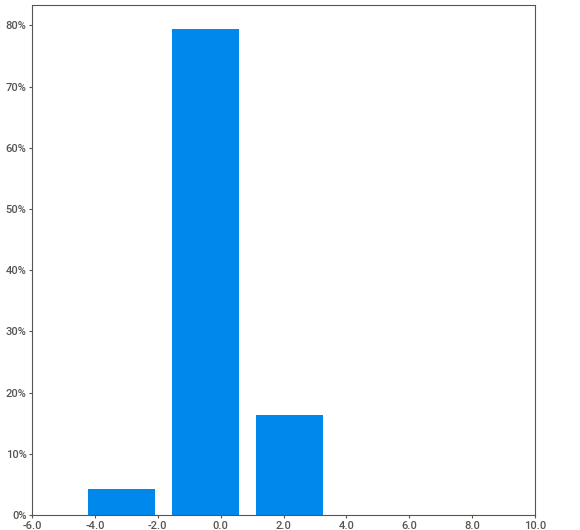
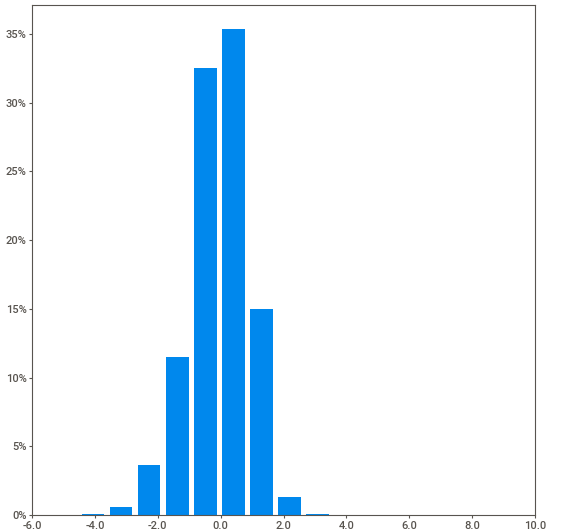
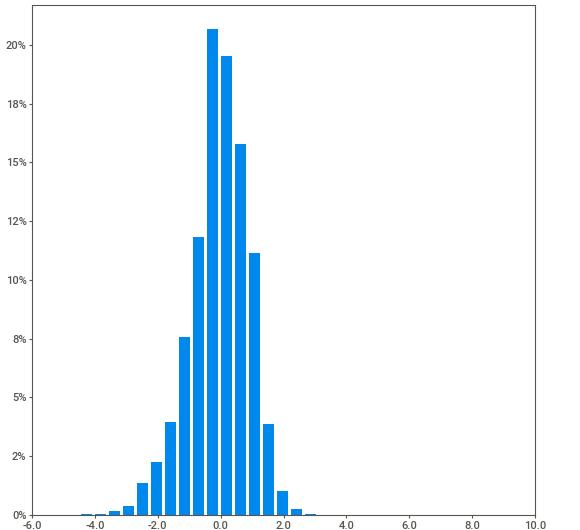
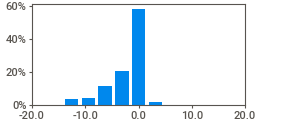
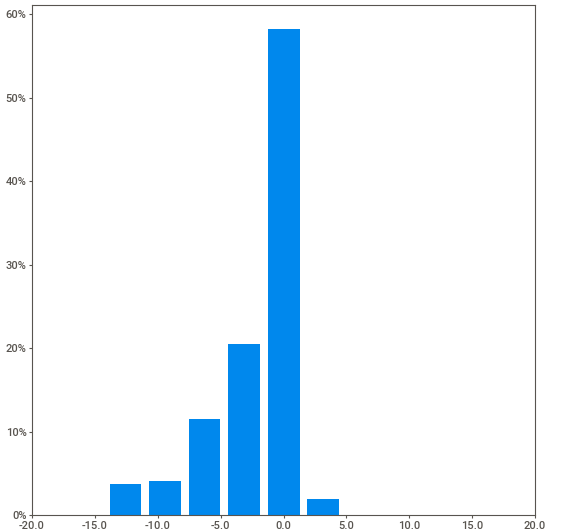
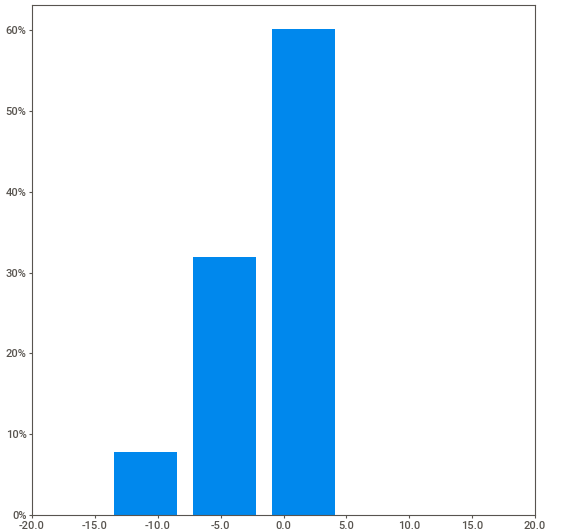
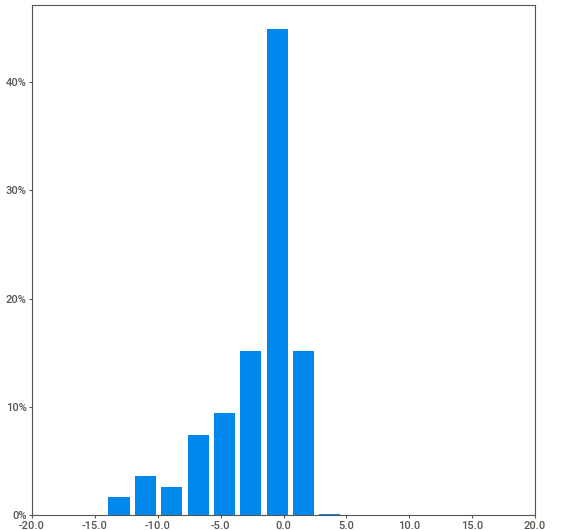
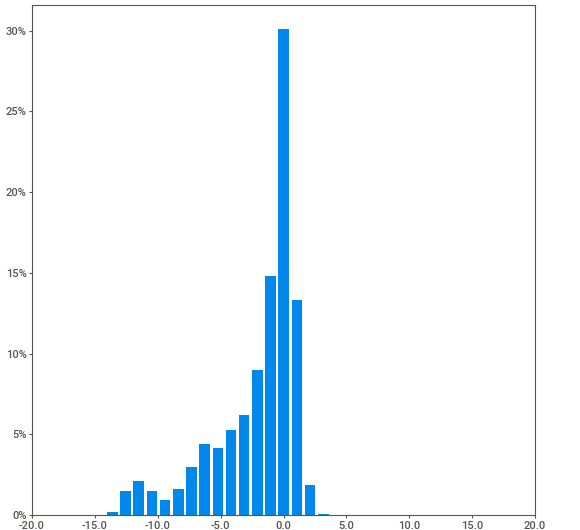
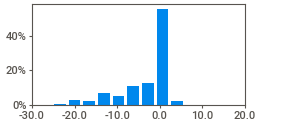
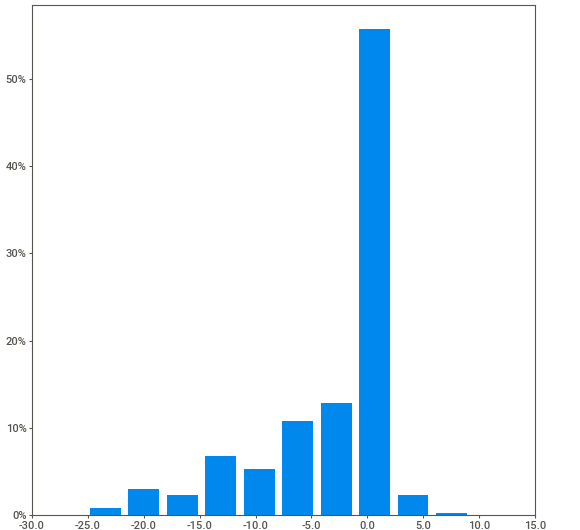
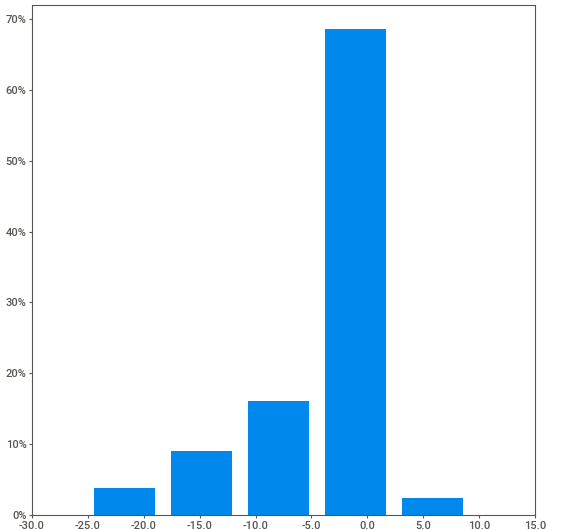
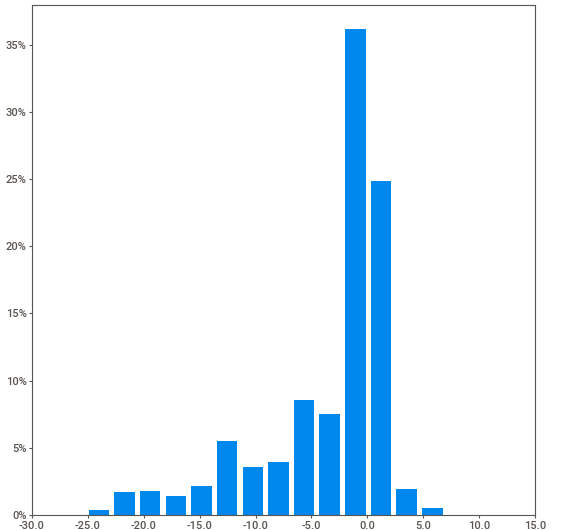
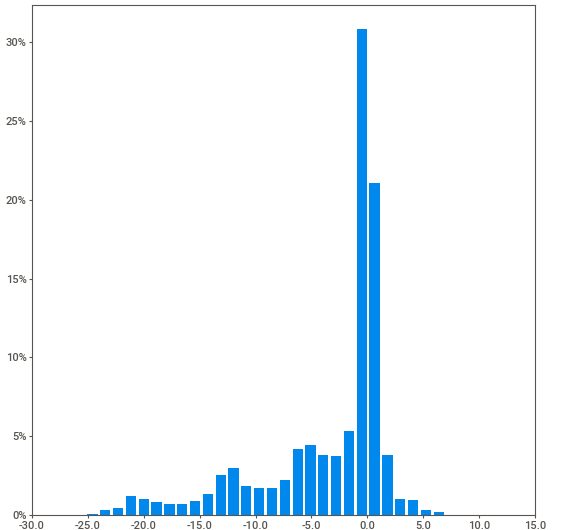
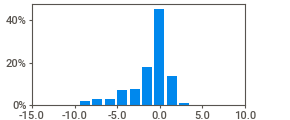
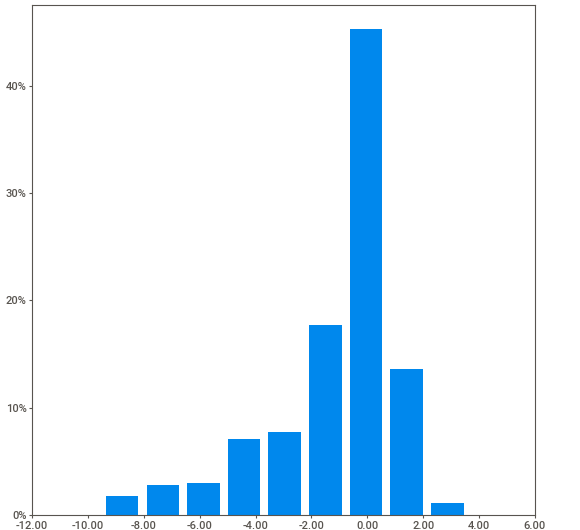
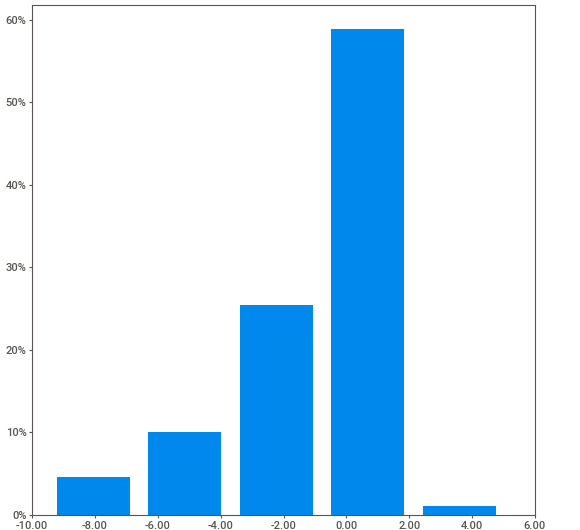
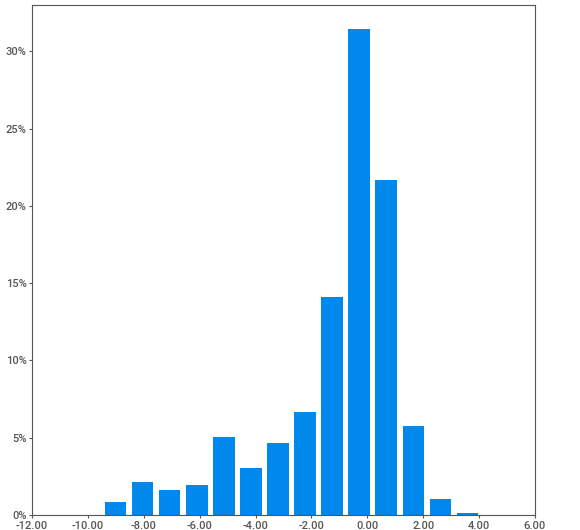
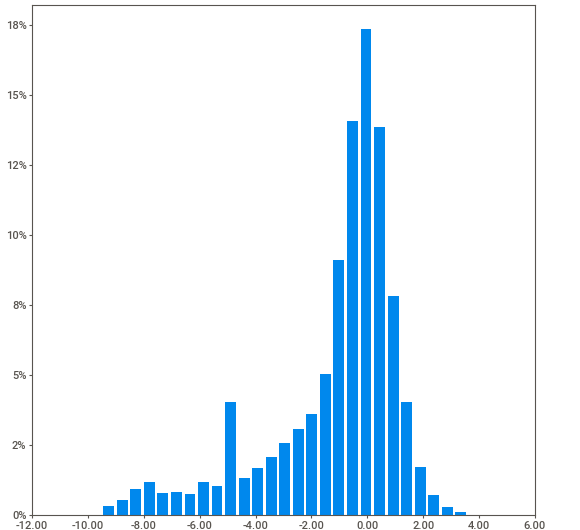
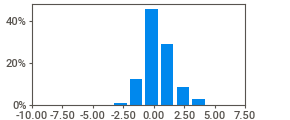
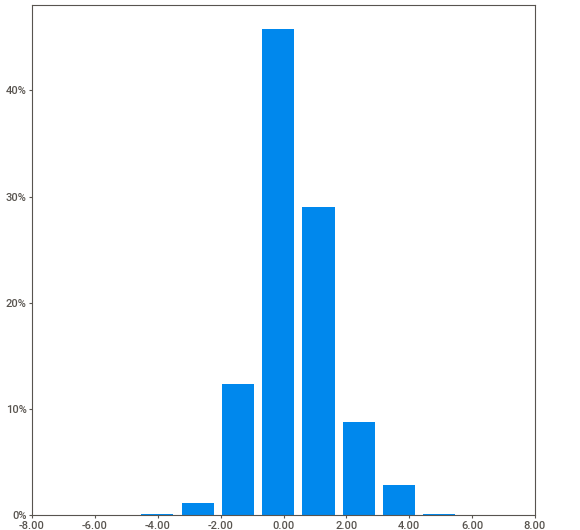
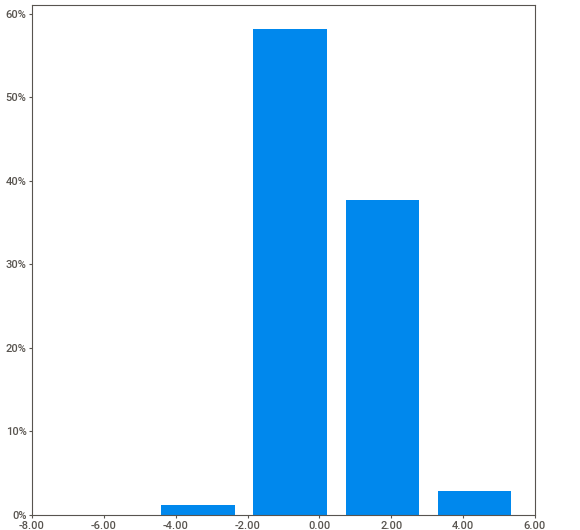
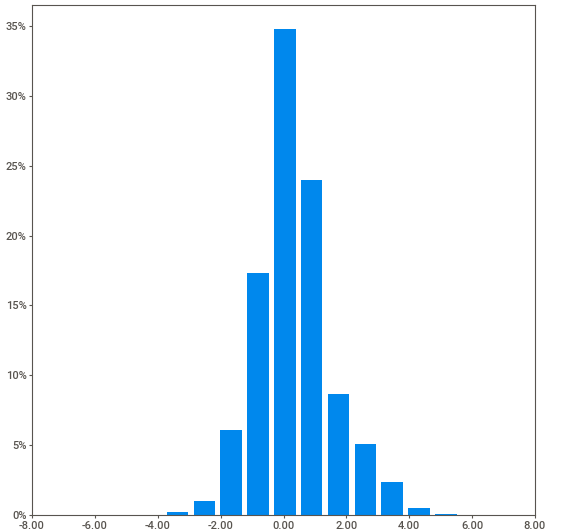
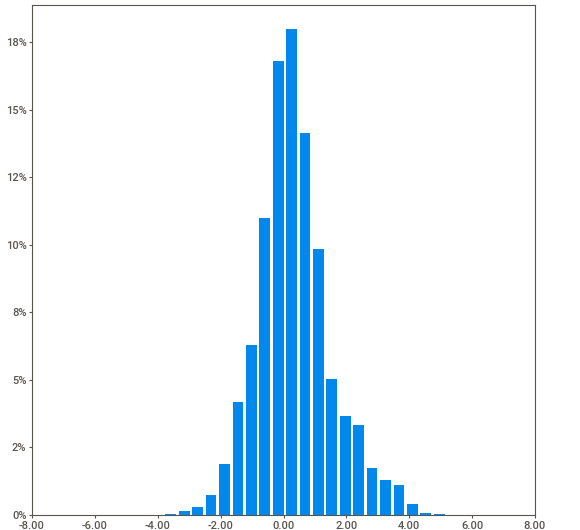
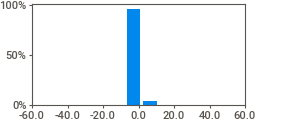
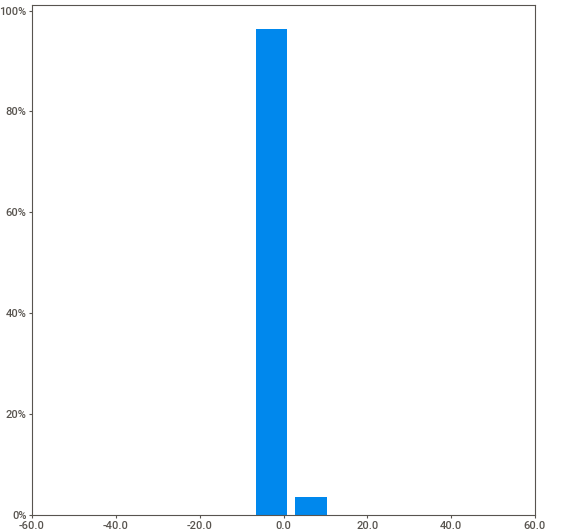
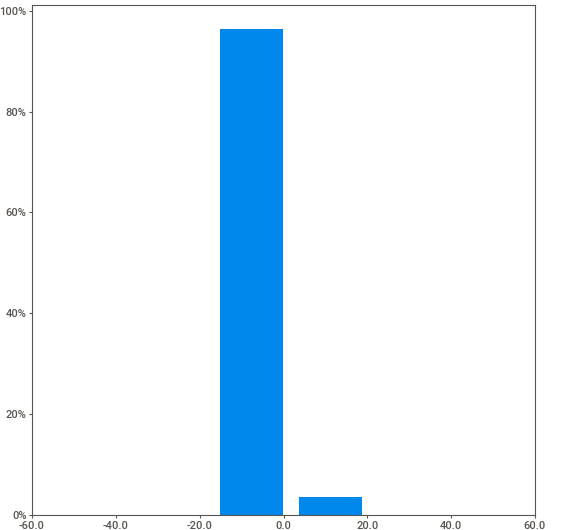
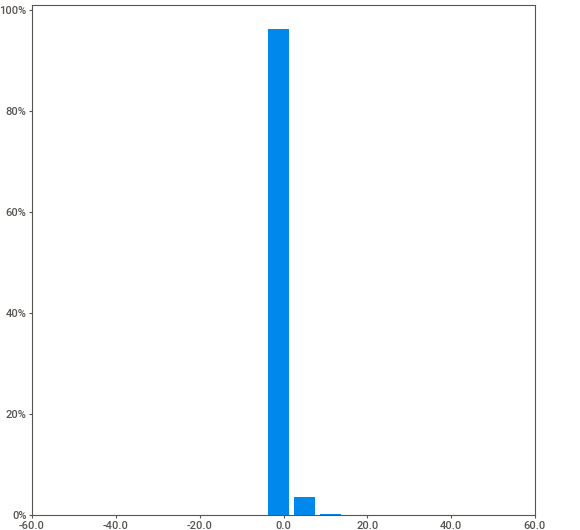
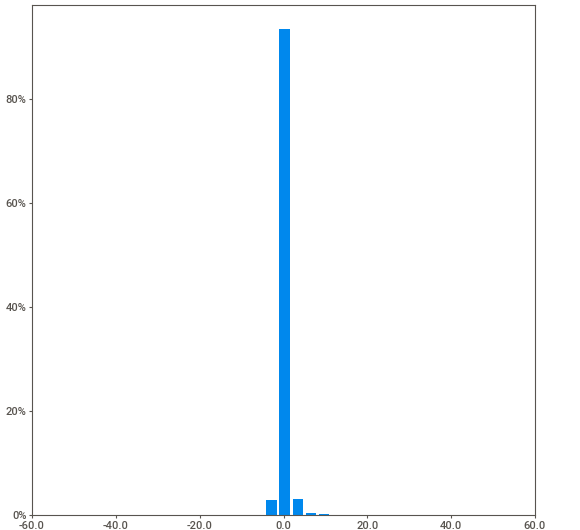
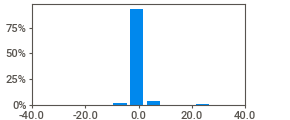
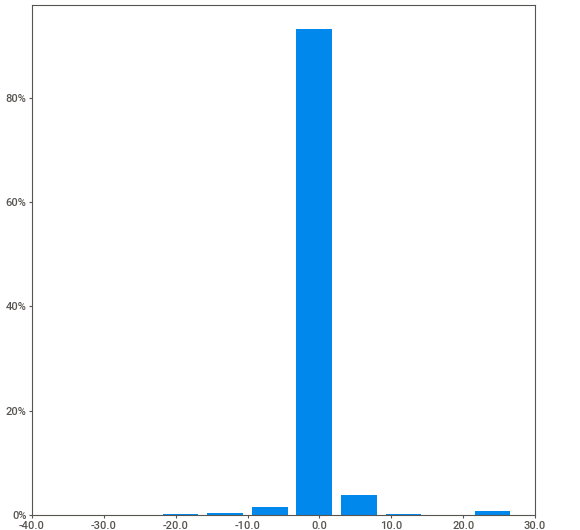
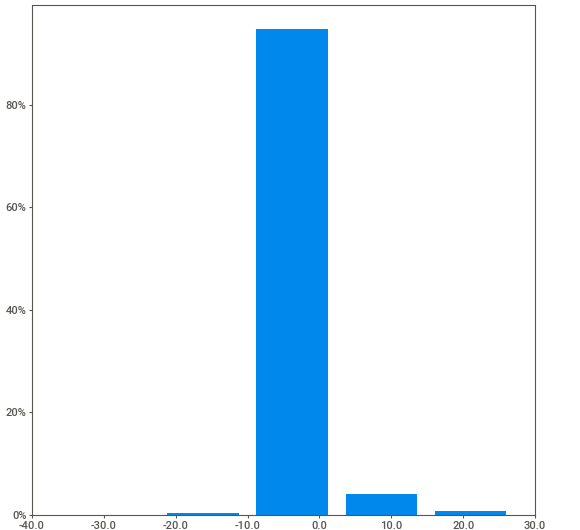
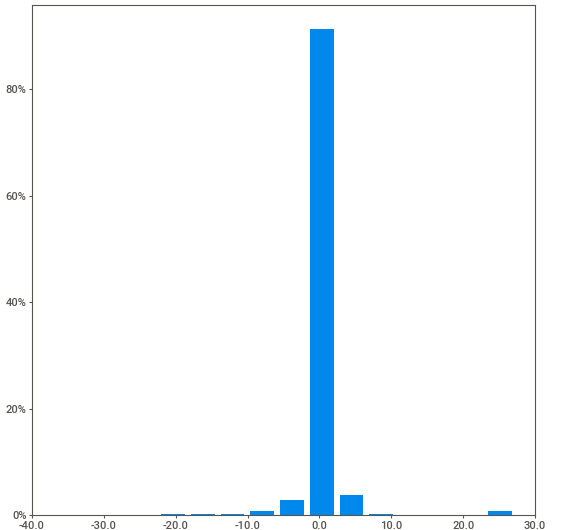
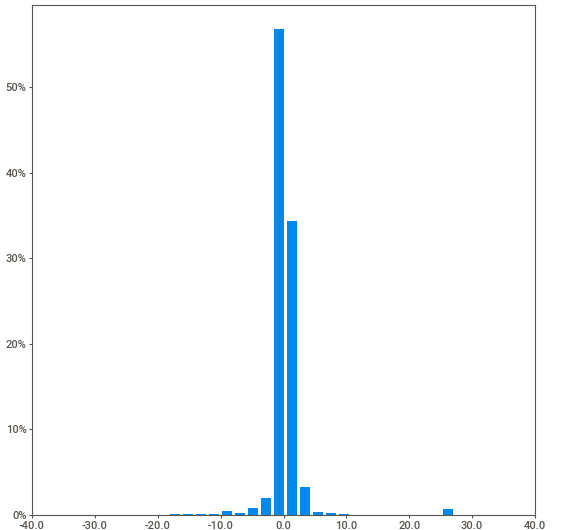
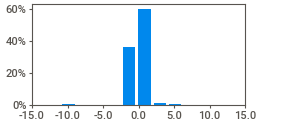
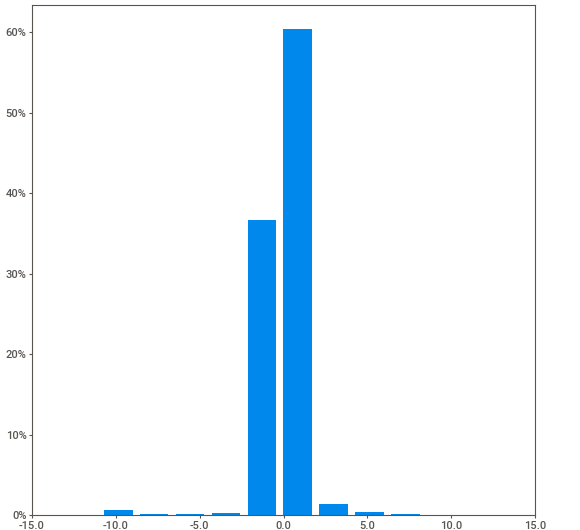
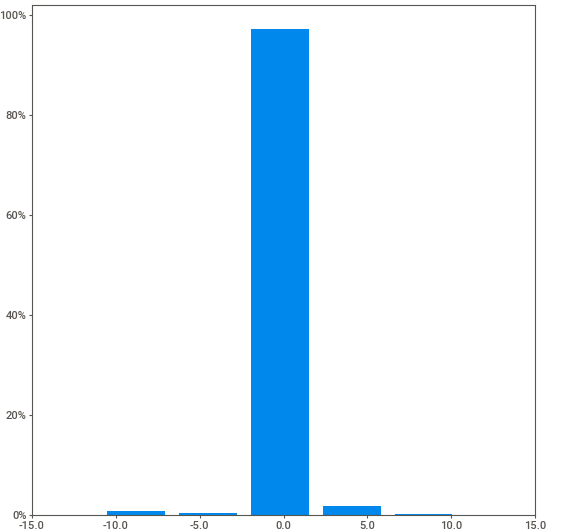
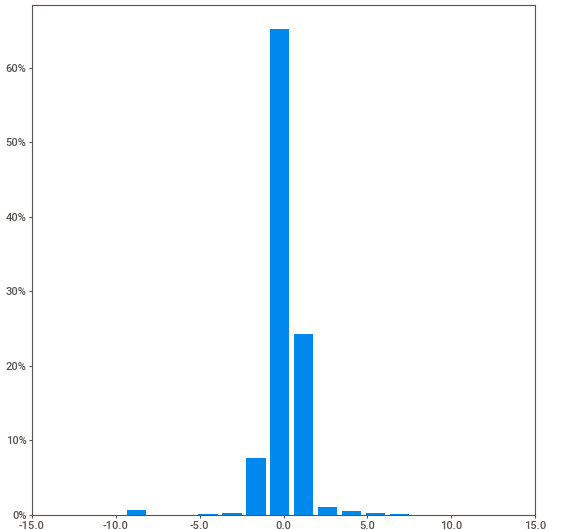
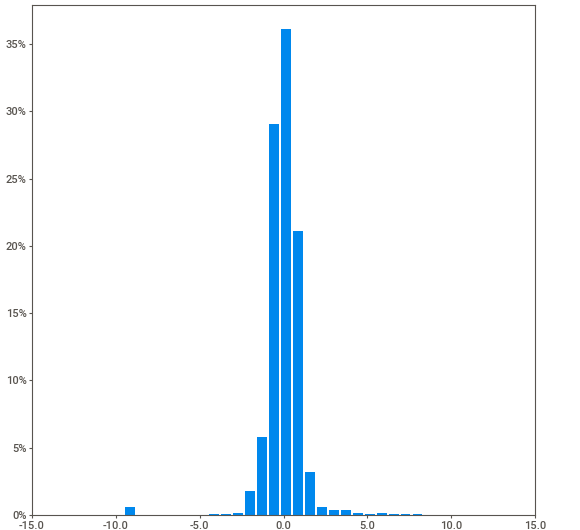
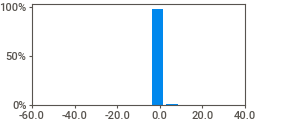
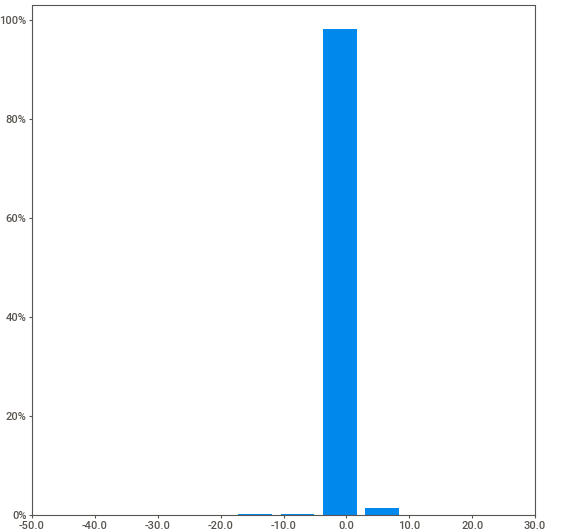
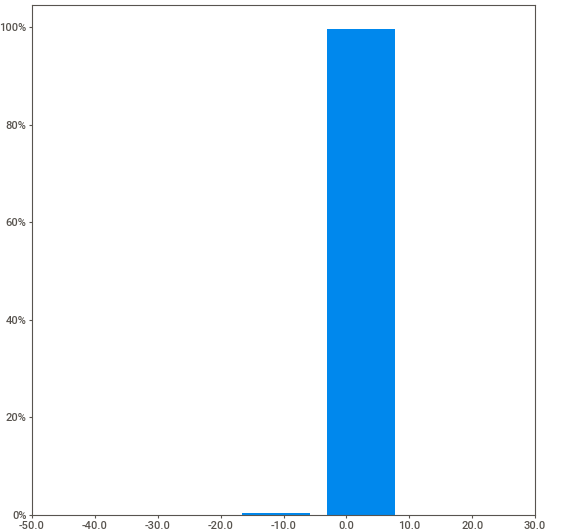
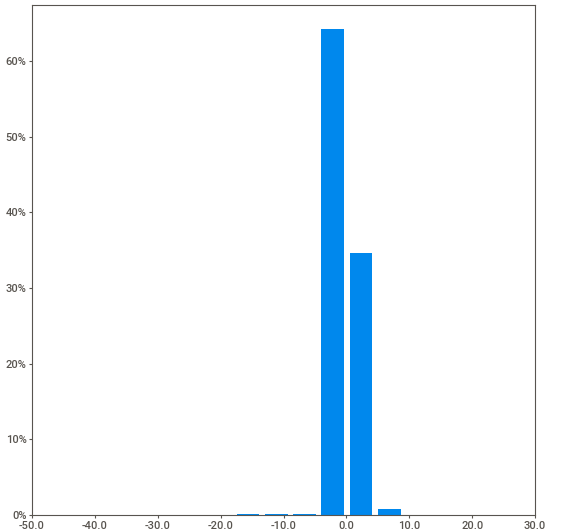
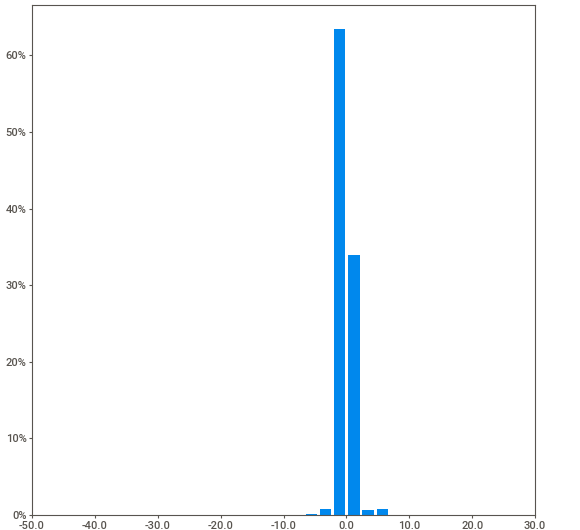
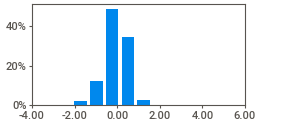
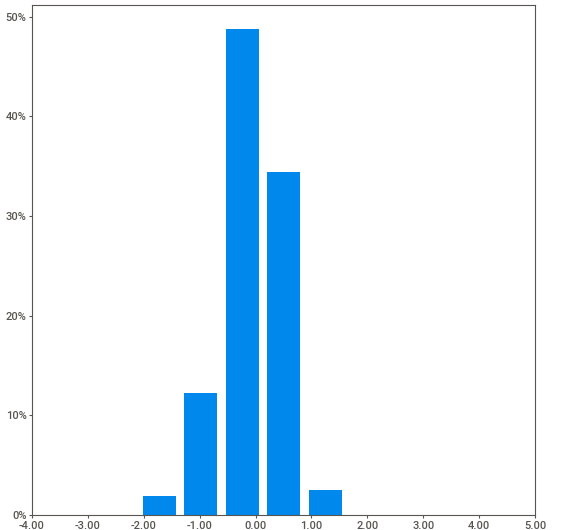
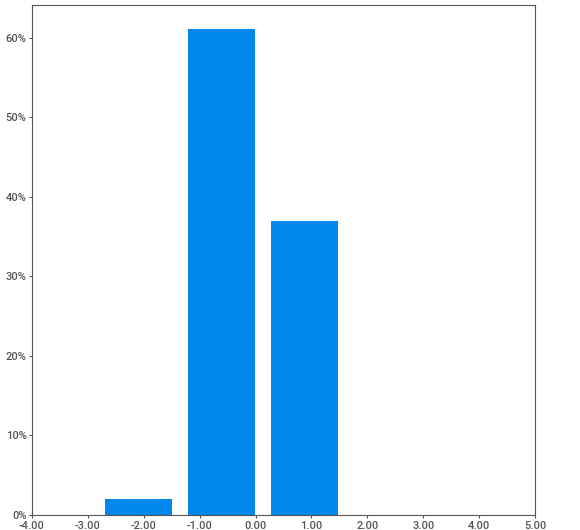
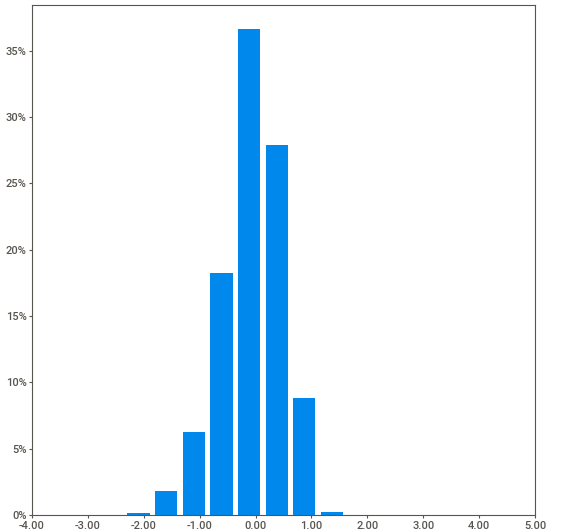
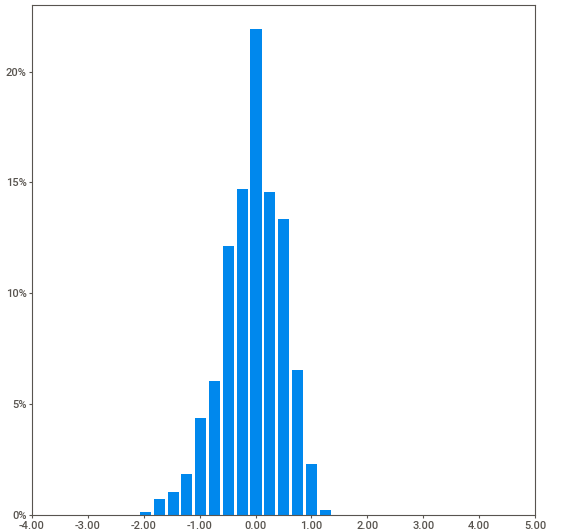
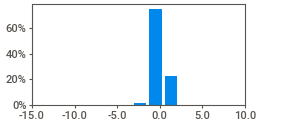
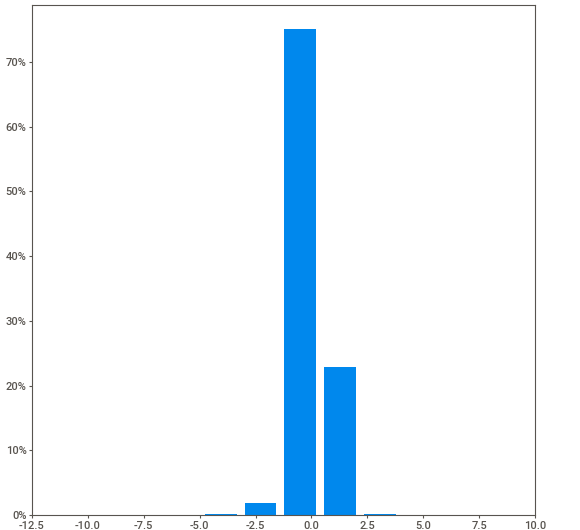
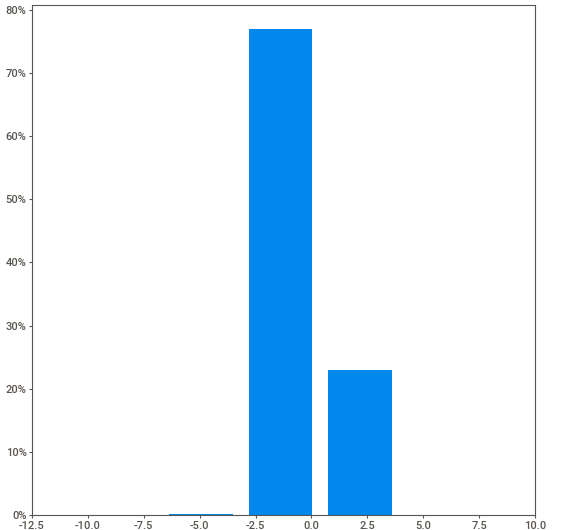
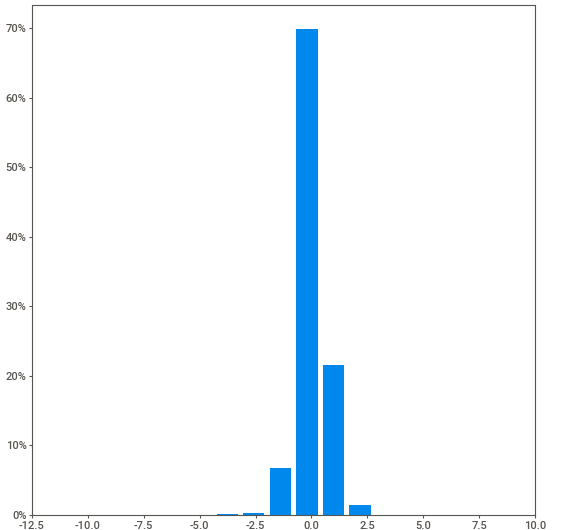
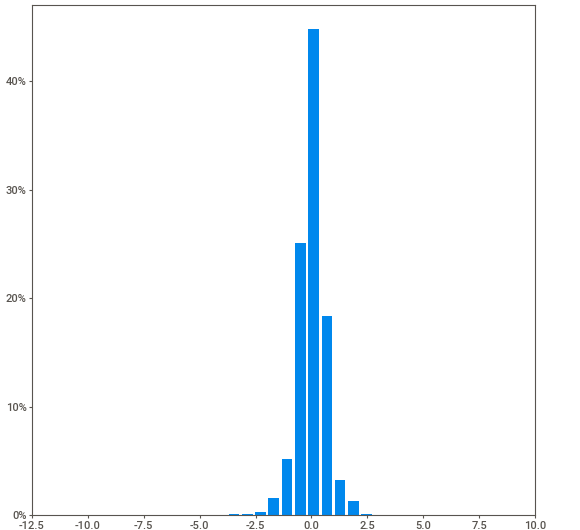
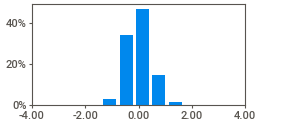
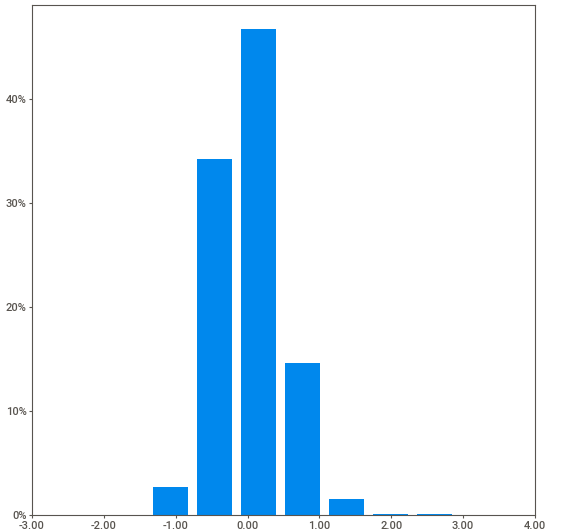
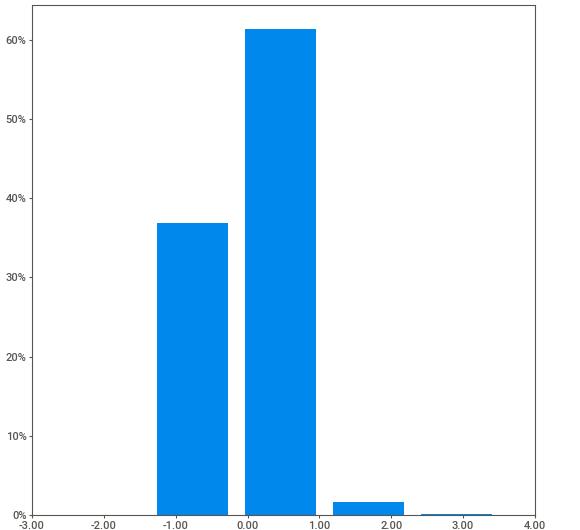
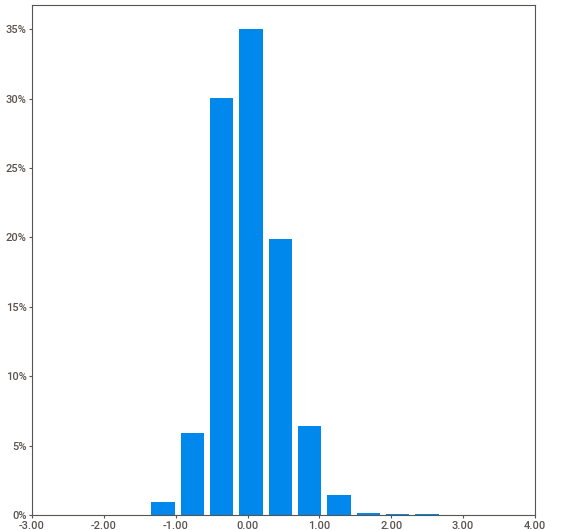
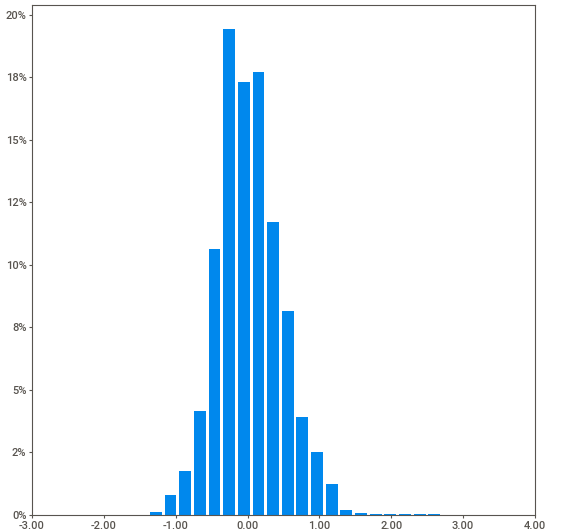
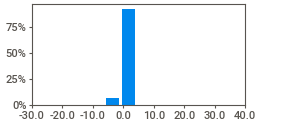
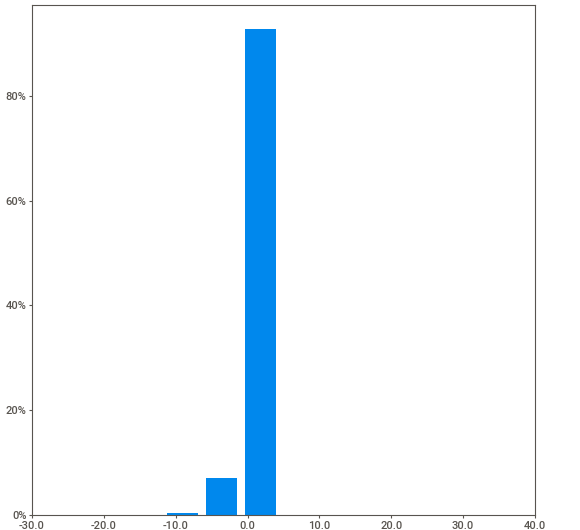
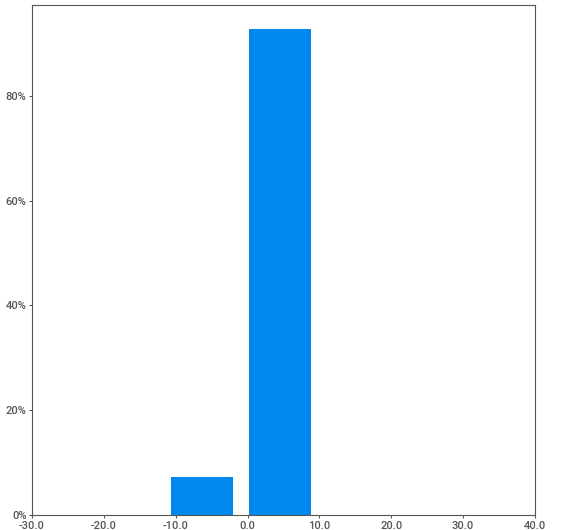
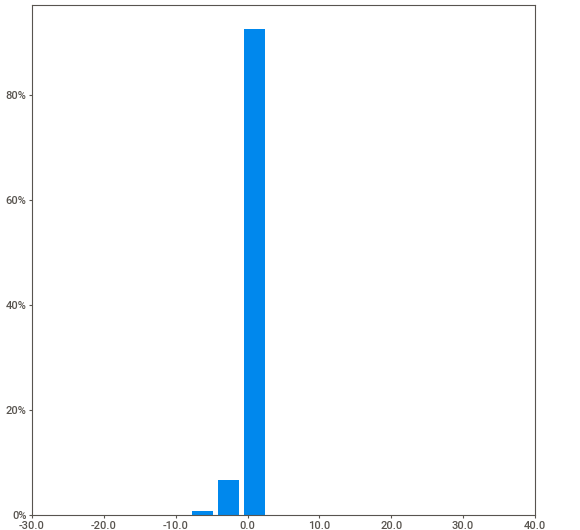
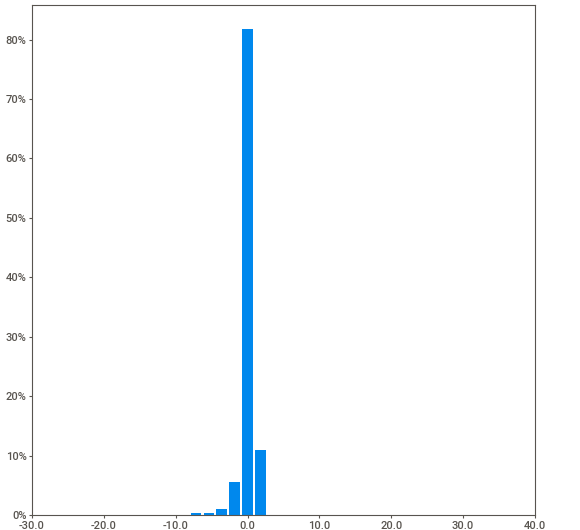
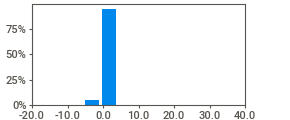
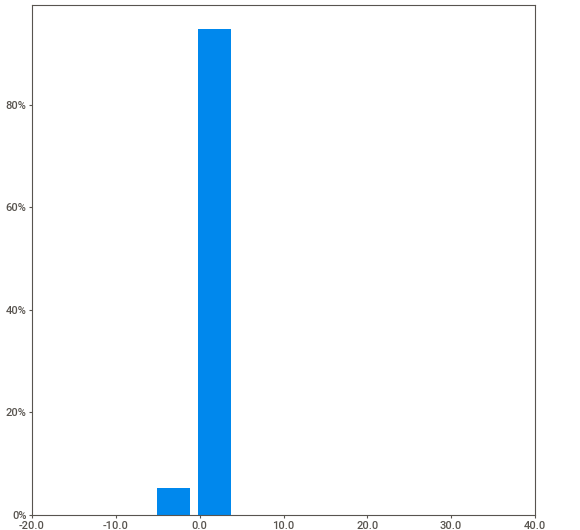
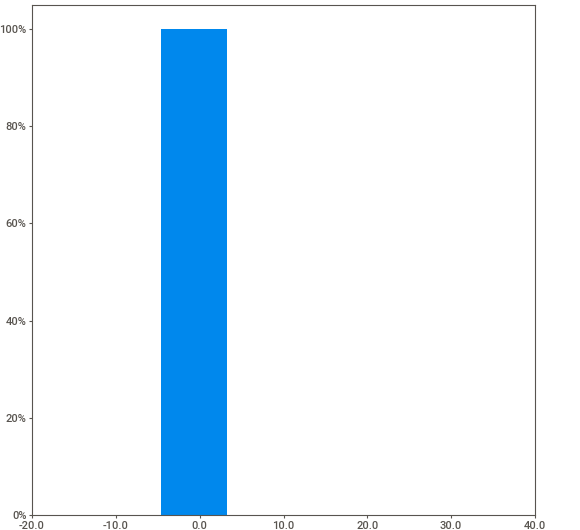
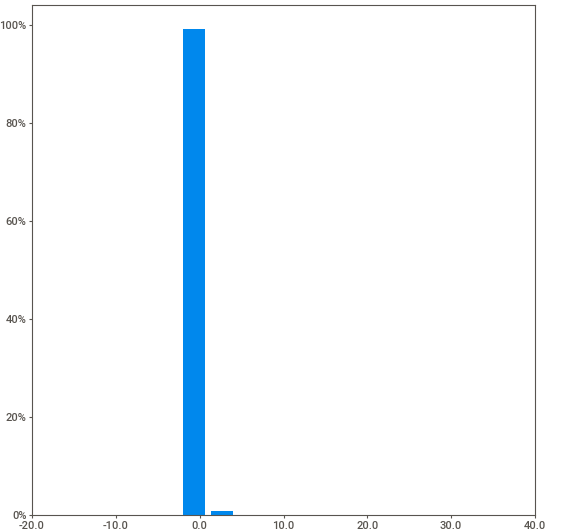
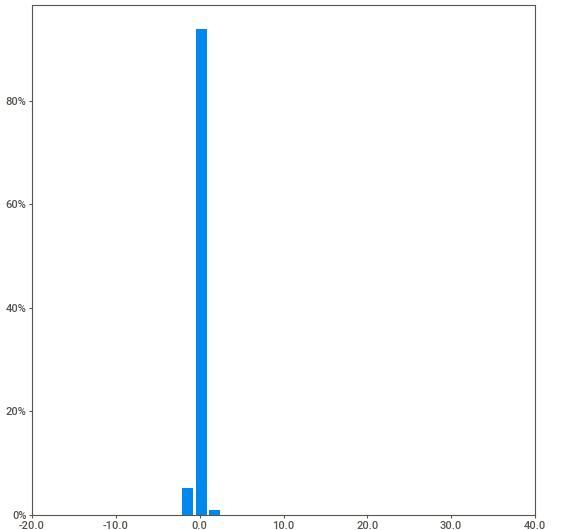
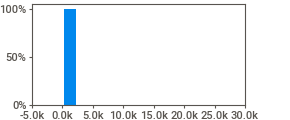
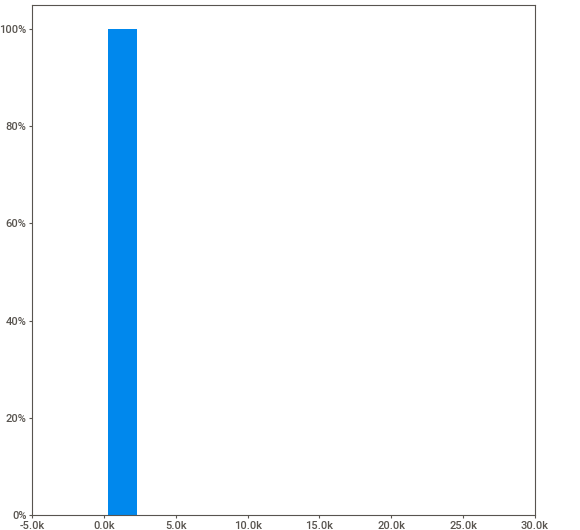
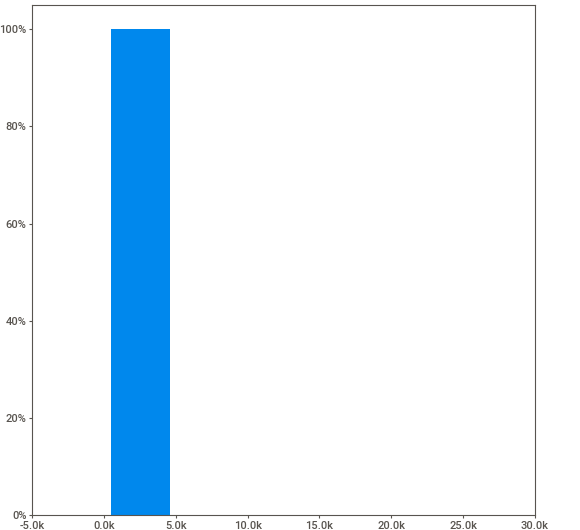
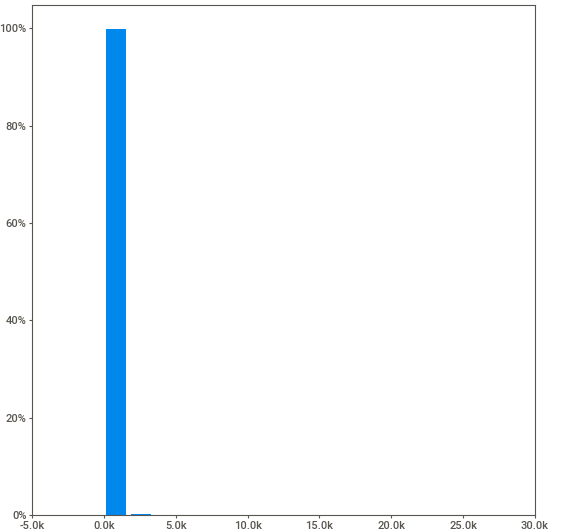
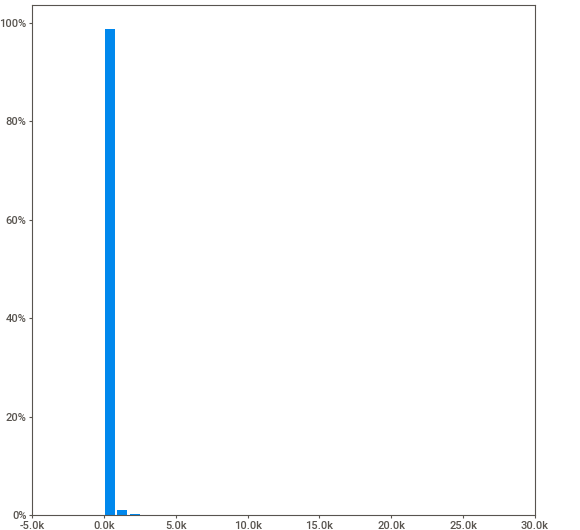
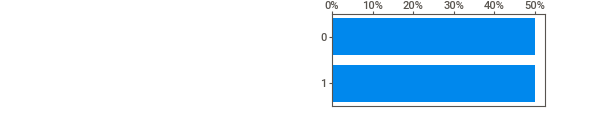
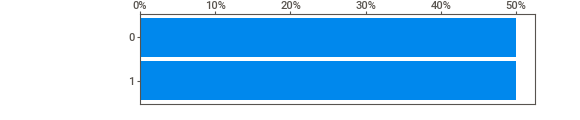
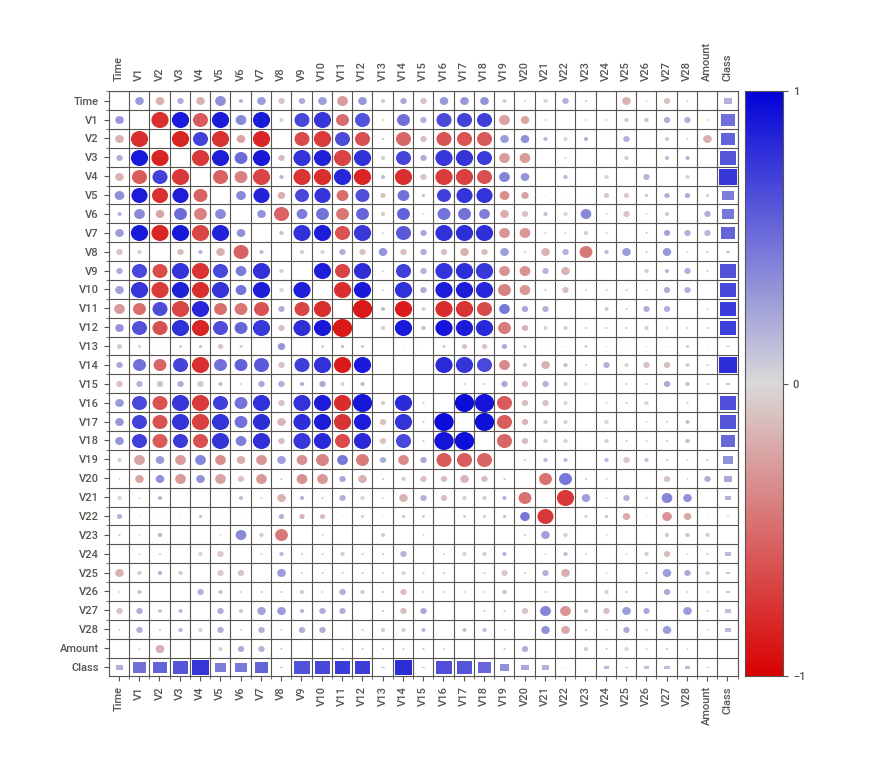
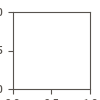

In [26]:
# Visualizing the Detailed Reports:
report.show_notebook()

In [27]:
# Understanding the DataFrame DataTypes:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [28]:
# Detailed DataFrame Information:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    568630 non-null  float64
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

Dataset got no missing value as all feature possess 284807 (maximum)

In [29]:
# printing unique values for each column
for i in df.columns:
    print(i,df[i].nunique())

Time 399164
V1 552025
V2 552027
V3 552029
V4 552026
V5 552029
V6 552024
V7 552023
V8 552015
V9 552028
V10 552018
V11 552020
V12 552026
V13 552029
V14 552025
V15 552025
V16 552017
V17 552018
V18 552027
V19 552017
V20 552004
V21 551989
V22 552016
V23 551983
V24 552017
V25 552012
V26 552019
V27 551969
V28 551930
Amount 256842
Class 2


In [30]:
#calculalting the total duplicate values in the Created DataFrame

df.duplicated().sum()

8532

There are duplicates in the dataset, which is okay to retain because several transactions may be executed by one creditcard at same amount and time. Hence, is safe to retain duplicates to avoid removing important features.

In [31]:
# Understanding the Features Nature:

df.describe()

Time             V1             V2             V3  \
count  568630.000000  568630.000000  568630.000000  568630.000000   
mean    87818.934720      -2.473468       1.915852      -3.642628   
std     48121.839247       5.446449       3.632325       6.145809   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     46004.895144      -3.060335      -0.094872      -5.230748   
50%     80283.500000      -0.819901       1.020226      -1.550720   
75%    134730.750000       0.826010       2.892812       0.267757   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  568630.000000  568630.000000  568630.000000  568630.000000   
mean        2.327472      -1.625158      -0.714689      -2.927150   
std         3.142557       4.127046       1.706042       5.708276   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%        -0.053983      -1.826666      -1.548754      -3.251343   
50%         1.481414      -0.444632      -0.692929      -0.752219   
75%         4.339191       0.427730       0.023763       0.186328   
max        16.875344      34.801666      73.301626     120.589494   

                  V8             V9  ...            V21            V22  \
count  568630.000000  568630.000000  ...  568630.000000  568630.000000   
mean        0.265285      -1.330435  ...       0.399645      -0.009664   
std         4.969988       2.224967  ...       2.864329       1.168768   
min       -73.216718     -13.434066  ...     -34.830382     -10.933144   
25%        -0.197940      -2.324595  ...      -0.158189      -0.498755   
50%         0.168431      -0.809343  ...       0.161706       0.021607   
75%         0.852409       0.077581  ...       0.649646       0.526878   
max        20.007208      15.594995  ...      27.202839      10.503090   

                 V23            V24            V25            V26  \
count  568630.000000  568630.000000  568630.000000  568630.000000   
mean       -0.002834      -0.055105       0.026087       0.027824   
std         1.014914       0.539759       0.612429       0.446920   
min       -44.807735      -2.836627     -10.295397      -2.604551   
25%        -0.223012      -0.384585      -0.302902      -0.267081   
50%        -0.026558      -0.008043       0.044851      -0.006961   
75%         0.187852       0.339494       0.367149       0.308256   
max        22.528412       4.584549       7.519589       3.517346   

                 V27            V28         Amount     Class  
count  568630.000000  568630.000000  568630.000000  568630.0  
mean        0.081257       0.041545      95.524613       0.5  
std         0.951350       0.417802     220.351621       0.5  
min       -22.565679     -15.430084       0.000000       0.0  
25%        -0.067497      -0.057070       3.339762       0.0  
50%         0.058331       0.036705      25.000000       0.5  
75%         0.433484       0.213839      99.990000       1.0  
max        31.612198      33.847808   25691.160000       1.0  

[8 rows x 31 columns]

In [32]:
# Finding rows where all columns have values greater than 1 for future scaling (One-Hot Encoding)

# Iterate through columns and print values greater than 1
for column in df.columns:
    values_greater_than_1 = df[column] > 1
    result = df.loc[values_greater_than_1, column]
    print(f"Column {column}:")
    print(result)

Column Time:
4              2.000000
5              2.000000
6              4.000000
7              7.000000
8              7.000000
              ...      
568625    144838.659385
568626     65965.011763
568627     34592.129093
568628    129683.002907
568629     91471.277869
Name: Time, Length: 568626, dtype: float64
Column V1:
1         1.191857
6         1.229658
10        1.449044
12        1.249999
13        1.069374
            ...   
568552    1.076715
568554    1.701911
568557    1.150454
568573    1.475246
568586    1.012906
Name: V1, Length: 130077, dtype: float64
Column V2:
7         1.417964
9         1.119593
37        1.765124
41        2.198527
42        1.031345
            ...   
568624    4.138501
568625    1.672637
568627    2.368957
568628    2.432041
568629    3.210469
Name: V2, Length: 286952, dtype: float64
Column V3:
0         2.536347
2         1.773209
3         1.792993
4         1.548718
5         1.141109
            ...   
567812    1.215970
567908    1.16

In [33]:
# Converting the 'Time' Column to the proper datatype:

import pandas as pd

# Converting the 'Time' column from float to datetime
df['Time'] = pd.to_datetime(df['Time'], unit='s')

In [34]:
# Visualizing the New dates in the 'Time' Column

df['Time'].sample(15)

23846    1970-01-01 09:09:10.000000000
78175    1970-01-01 15:56:41.000000000
282135   1970-01-02 23:24:41.000000000
309394   1970-01-01 09:45:44.795203628
314637   1970-01-02 18:16:09.751214309
24489    1970-01-01 09:14:19.000000000
415707   1970-01-01 02:04:01.859360449
2076     1970-01-01 00:26:41.000000000
540282   1970-01-01 09:38:05.600463212
342339   1970-01-02 20:34:09.100895887
56615    1970-01-01 13:11:46.000000000
487634   1970-01-01 13:06:27.953080226
522076   1970-01-02 22:22:57.581340989
392133   1970-01-01 13:26:49.987381667
537169   1970-01-02 19:35:35.743024731
Name: Time, dtype: datetime64[ns]

In [35]:
# Decribing the Average Amount Transacted At Specified Time:
print(df[['Time', 'Amount']].describe())

                                Time         Amount
count                         568630  568630.000000
mean   1970-01-02 00:23:38.934719623      95.524613
min              1970-01-01 00:00:00       0.000000
25%    1970-01-01 12:46:44.895144369       3.339762
50%       1970-01-01 22:18:03.500000      25.000000
75%       1970-01-02 13:25:30.750000      99.990000
max              1970-01-02 23:59:52   25691.160000
std                              NaN     220.351621


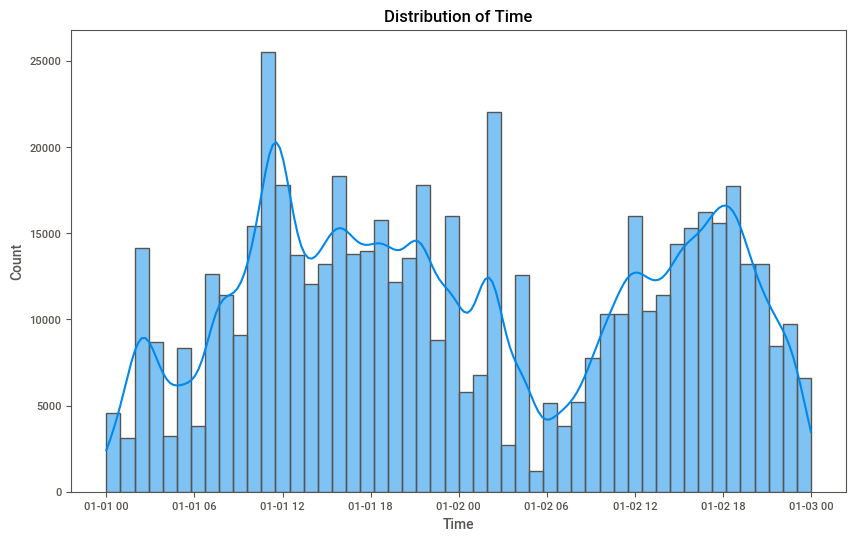

In [36]:
# Plotting a histogram of the 'Time' column to understand the distribution Peak Time:
plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()

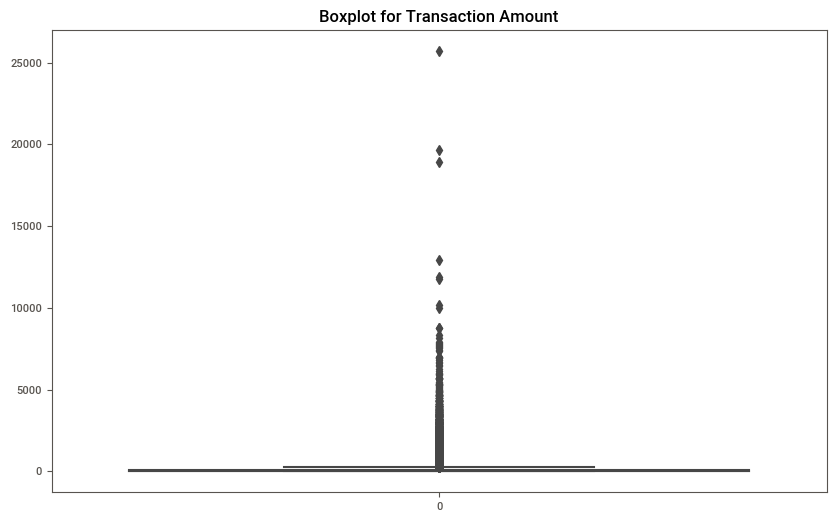

In [37]:
# Exploring the Relationship between Time and Transaction:

# Outliers: Visualization on the Boxplot

plt.figure(figsize = (10,6))
plt.title('Boxplot for Transaction Amount')
sns.boxplot(df['Amount'])
plt.show()

In [38]:
# Defining the file path
file_path = r'C:\Users\user\Documents\Others\Home\Trainings\Data_Science_Course\Knowledge_Hut_BootCamp\Data Scientist Bootcamp_capstone_project\final_project_docs\balanced_datasetcreditcard.csv'

# Saving the DataFrame to a CSV file
df.to_csv(file_path, index=False)  # Set index=False to exclude the index column

print(f"DataFrame saved to {file_path}")

DataFrame saved to C:\Users\user\Documents\Others\Home\Trainings\Data_Science_Course\Knowledge_Hut_BootCamp\Data Scientist Bootcamp_capstone_project\final_project_docs\balanced_datasetcreditcard.csv


For computation efficiency and time, reducing the Dataset size becomes import from 568630 to about 20000 will be an effective approach building, hyperparameter tuning, training, and evaluating the Model:

In [39]:
import pandas as pd
import numpy as np

# Setting the number of samples (flexible depending on convenience)
n_samples = 20000

# Randomly sample 20,000 rows from the original DataFrame
df2 = df.sample(n=n_samples, random_state=42)

# Reset the index of the new DataFrame
df2 = df2.reset_index(drop=True)

In [40]:
# Printing the Sample Data Shape:

df2.shape

(20000, 31)

In [41]:
df2.sample(12)

Time        V1        V2        V3        V4  \
12212 1970-01-01 18:14:58.000000000 -0.365646  0.838266  1.339987  0.520023   
9587  1970-01-02 01:25:06.593208990 -0.443783  2.477209 -2.710139  1.029596   
11196 1970-01-02 11:35:57.000000000 -0.732585 -0.363996  2.194781 -2.089286   
15945 1970-01-02 20:16:43.000000000  0.119380  1.073474 -1.047967 -0.994508   
17612 1970-01-01 17:42:44.000000000  0.983056 -1.166256 -0.038487 -0.414073   
4057  1970-01-02 15:52:09.000000000 -0.183232  0.268158 -1.103095 -1.299088   
14004 1970-01-02 09:04:56.000000000  0.088433  1.087689 -0.647217 -1.043501   
19697 1970-01-02 04:14:02.568957903 -1.657799  2.936569 -6.565645  2.941980   
10470 1970-01-02 18:25:11.767435175  0.075505  1.269039  0.678852  2.584539   
15818 1970-01-02 17:33:19.980873450 -2.719689  1.718318 -4.289252  3.214347   
11382 1970-01-02 16:05:48.462445068 -4.856734  2.374303 -5.723631  3.889361   
11584 1970-01-01 11:11:47.138602063  0.992565  2.908491 -4.300707  4.739824   

             V5        V6        V7        V8        V9  ...       V21  \
12212  0.320388 -1.036577  0.518396 -0.141903 -0.654717  ... -0.132569   
9587   2.882447 -1.477734  1.662234 -1.520386  0.934495  ...  0.217289   
11196 -0.938382  0.739846 -0.676474  0.147842  0.429459  ... -0.289581   
15945  1.225761  0.240499  0.320222 -1.676156 -0.139113  ...  1.881335   
17612 -1.058299 -0.368319 -0.278189  0.015537 -0.872488  ... -0.272731   
4057   2.563805  3.762629  0.292326  0.747866 -1.794088  ...  0.017216   
14004  1.361786 -0.914717  1.226244 -0.290996 -0.395914  ...  0.314367   
19697 -2.018021 -1.366968 -5.182394 -3.350305 -0.876069  ... -1.524922   
10470  1.371644  0.495929  1.074421 -0.150330 -1.671130  ...  0.228090   
15818 -0.039187 -1.780222 -2.530822 -0.356039  0.117520  ...  0.026453   
11382 -0.974779 -2.529693 -4.775247  2.510367 -2.762840  ...  0.666996   
11584  2.540521 -2.118700  1.182773 -0.292386 -2.529863  ... -0.073884   

            V22       V23       V24       V25       V26       V27       V28  \
12212 -0.427984  0.090198  0.361924 -0.707183  0.086189  0.132015  0.180687   
9587  -1.069491 -0.272320 -0.025868  0.584741 -0.713486 -0.324648 -0.281468   
11196 -0.045661 -0.216496  0.169678  0.050214  0.963252 -0.094803 -0.084355   
15945  0.606872  0.035486 -0.118602 -0.263620 -0.268159  0.123765  0.016831   
17612 -0.629285 -0.091753  0.239283  0.192399  1.078941 -0.096793  0.012179   
4057   0.459811 -0.162797  0.674632 -0.248597 -0.429511  0.146459  0.172231   
14004  1.007705 -0.160089  0.464976 -0.816121  0.363574  0.194389  0.273352   
19697  0.659587  0.252434 -0.249637  0.220452 -0.503971 -0.005882  0.230756   
10470  0.749858 -0.189988  0.747227 -0.140573 -0.087587 -0.291827 -0.216164   
15818 -0.582550 -0.415946 -0.118691 -0.099016 -0.875022 -1.154332  0.485142   
11382 -0.188290 -1.448668 -0.261701  0.782002  0.021843  0.675754 -0.487274   
11584 -0.419926 -0.519750 -0.551862  1.337383  0.493202  0.128384  0.209795   

           Amount  Class  
12212    1.790000      0  
9587    23.985478      1  
11196   25.000000      0  
15945    1.000000      0  
17612  172.980000      0  
4057    60.000000      0  
14004    1.580000      0  
19697  134.836573      1  
10470    9.299216      1  
15818    1.379014      1  
11382    0.354691      1  
11584    0.987868      1  

[12 rows x 31 columns]

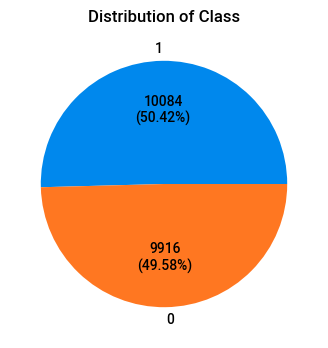

In [42]:
# Checking for imbalanced Dataset after Sampling:
# Visualizing the Class (Fraud and Safe Transaction)
def f1(x):
  total = sum(df2['Class'].value_counts().values)
  val = (x*total)/100
  return '{:.0f}\n({:.2f}%)'.format(val, x)

plt.figure(figsize = (4,4))
# df_without_dup['Cell Phone Access'].value_counts().plot(kind = 'pie', autopct = f1, 
# colormap = 'Wistia')
data = df2['Class'].value_counts()

plt.pie(data, labels = data.index, autopct = f1, textprops= {'fontsize':10})
plt.title('Distribution of Class')
plt.show()

Only 20 Fraudulent Transactions in sampled 12000 Transactions

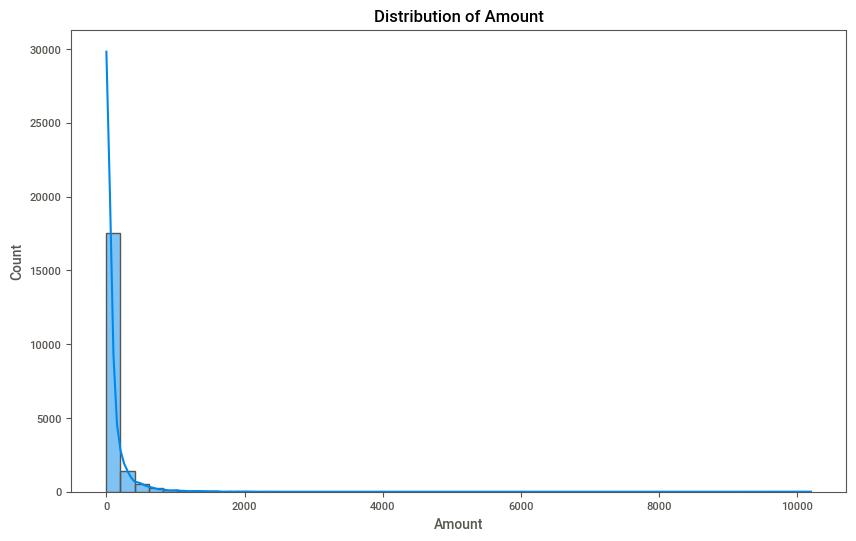

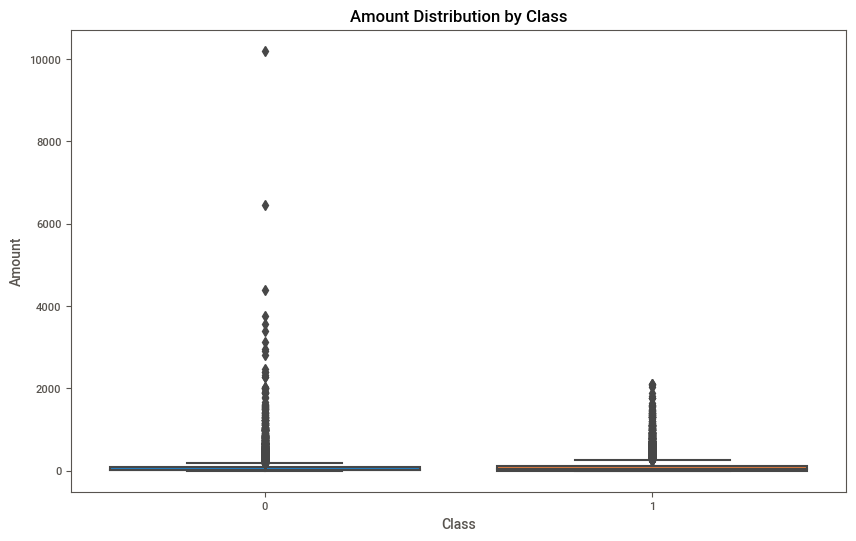

In [43]:
# Relationship between Time and Class (Fraudulent Transactions)
plt.figure(figsize=(10, 6))
sns.histplot(df2['Amount'], bins=50, kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df2)
plt.title('Amount Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

Three cases of fraudulent transactions are outliers.

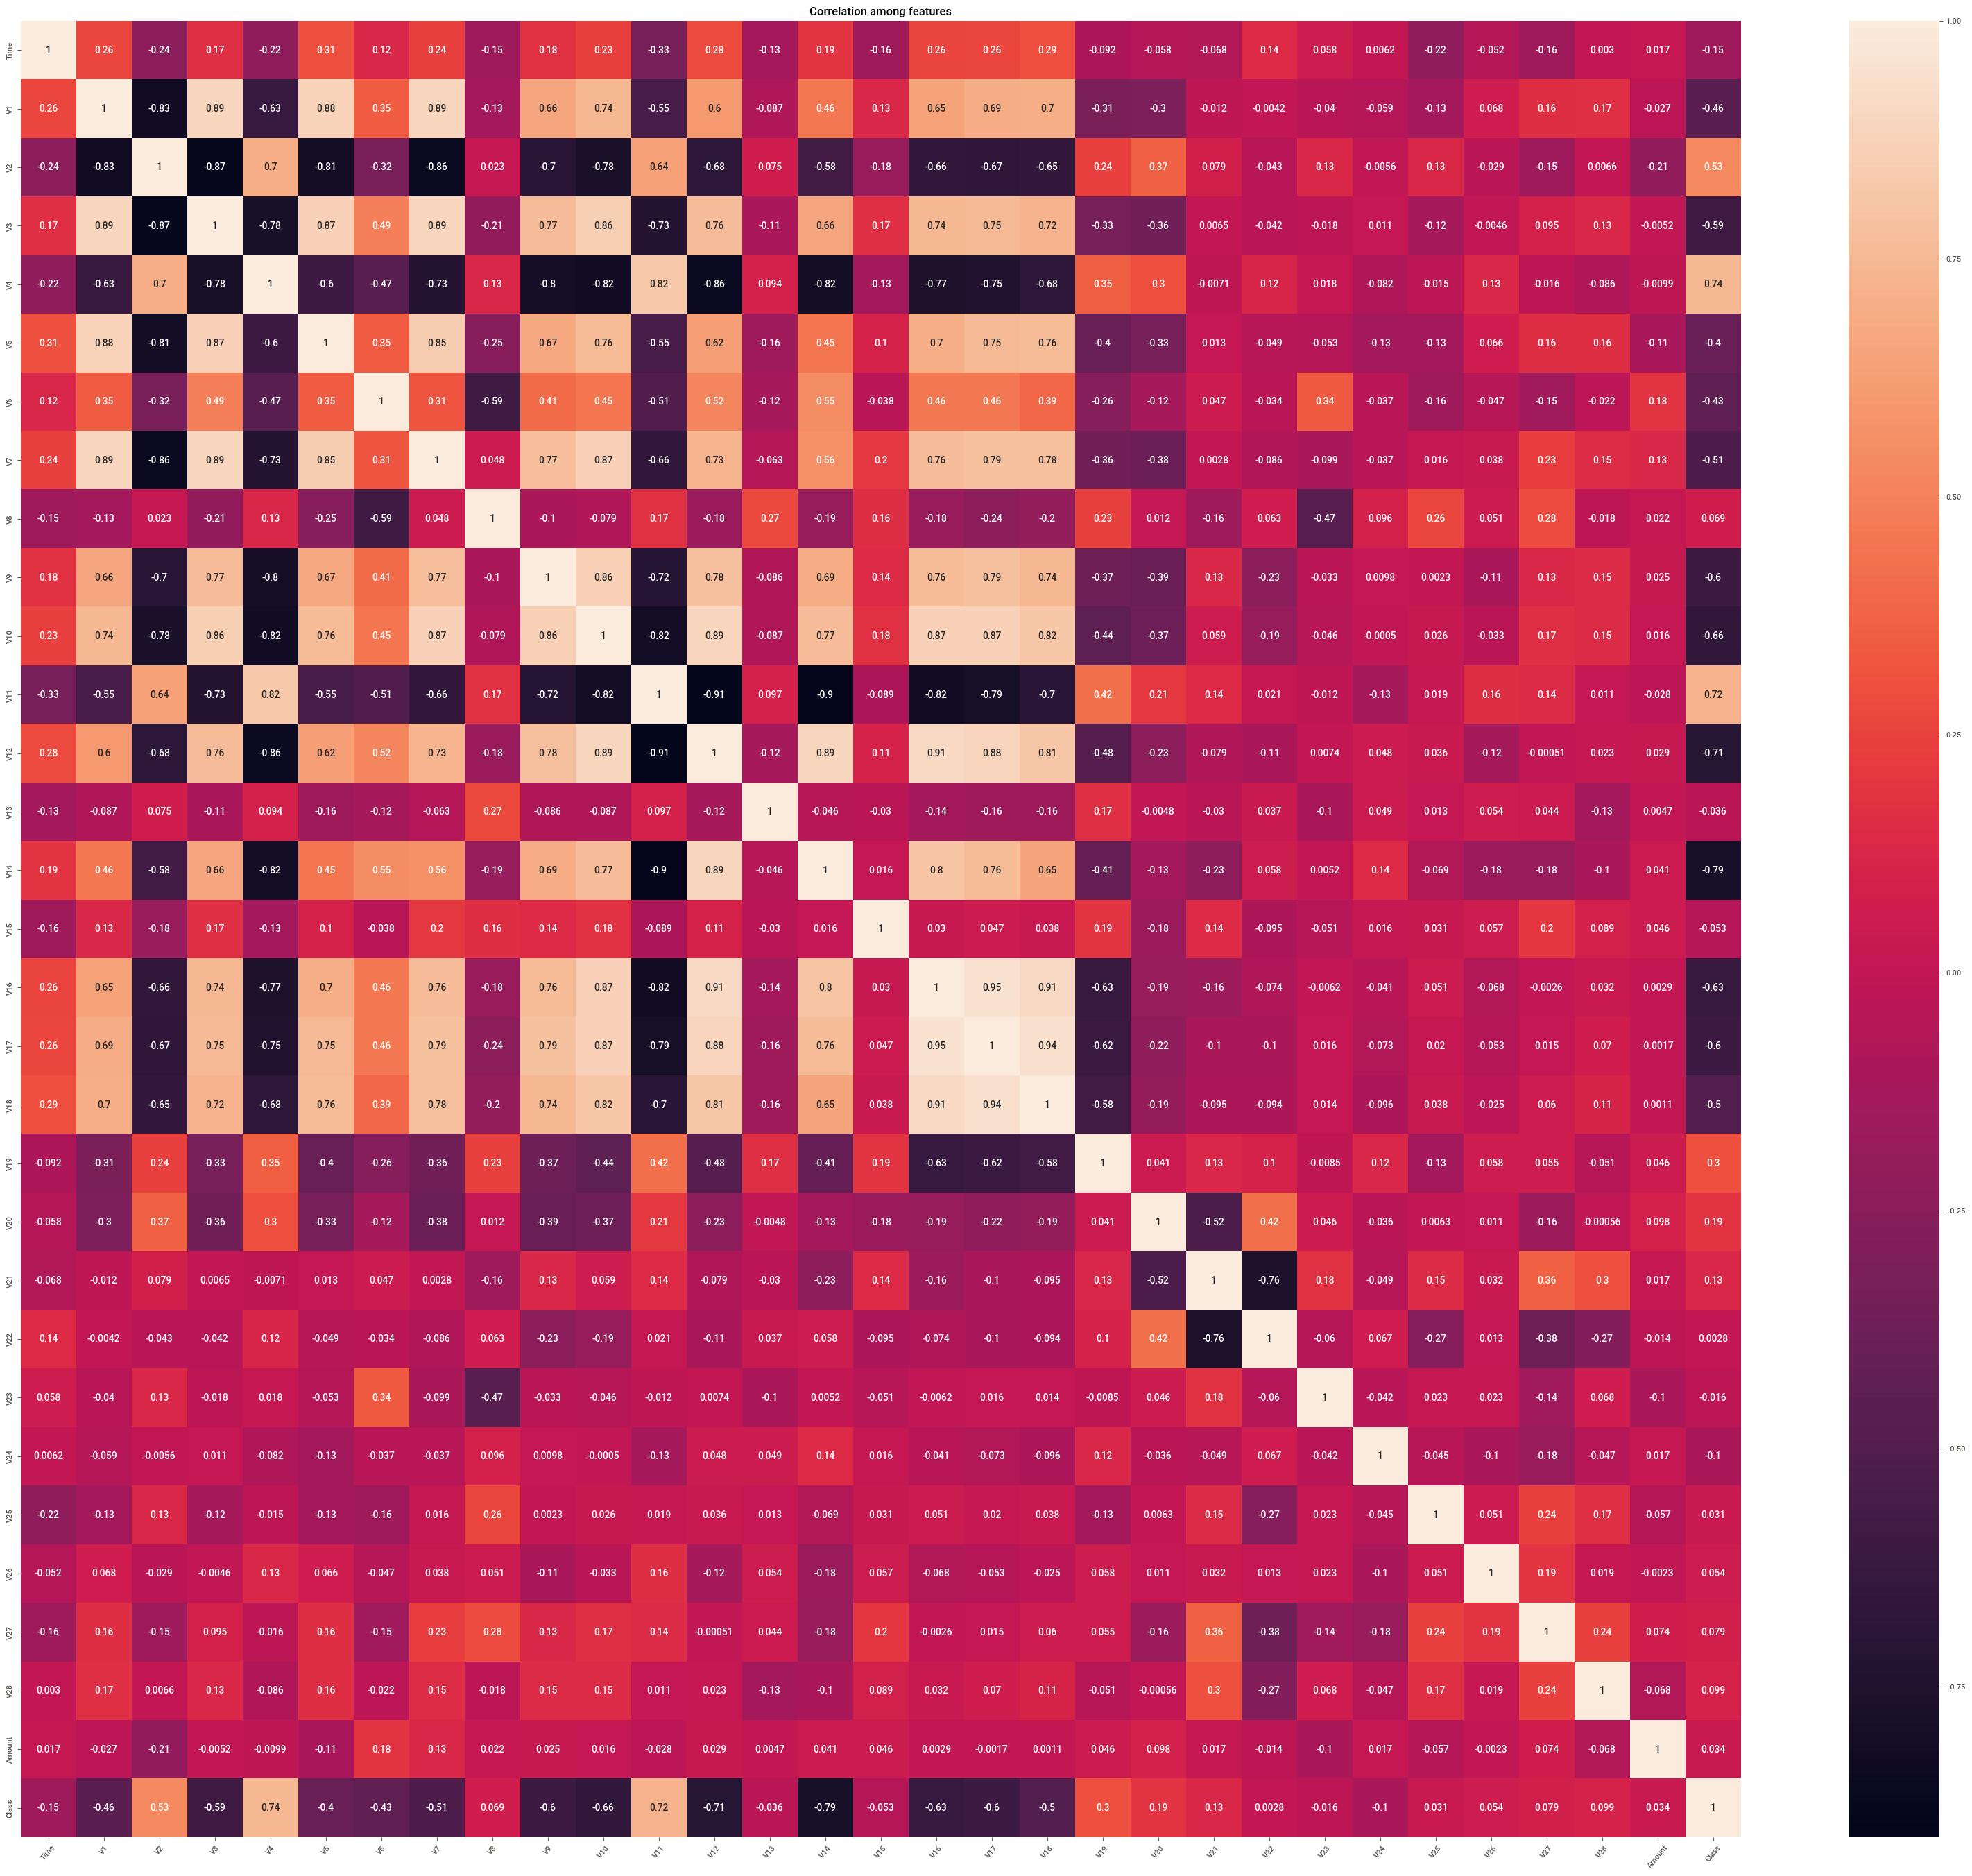

In [44]:
#  Plotting to Visualization to find Pair Correlation Values across features
import seaborn as sns

plt.figure(figsize = (40,34))
corr = df2.corr()
sns.heatmap(corr, annot = True)
plt.title('Correlation among features')
plt.xticks(rotation = 50)
plt.show()

# Features Transformation: Encoding and Scaling

In [45]:
# Converting the Time across the two Days into Binary (Day = 1 and Night = 0)
# Time column is in seconds, if not, convert it to seconds
df2['Time'] = (df2['Time'] - df2['Time'].min()).dt.total_seconds()

# Converting the 'Time' to hours
df2['Time_in_hours'] = df2['Time'] / 3600

# Defining the threshold to separate Day (1) and Night (0)
threshold = 18  # 6:00 PM in 24-hour format

# Creating the 'Time_of_day' column based on the threshold
df2['Time_of_day'] = df2['Time_in_hours'].apply(lambda x: 1 if x < threshold else 0)

# Dropping the original 'Time' and 'Time_in_hours' columns
df2 = df2.drop(columns=['Time', 'Time_in_hours'])

In [46]:
df2.head()

V1        V2        V3        V4        V5        V6        V7  \
0  0.369710  1.287013 -4.991047  2.061695 -0.610891 -0.158468 -3.375813   
1 -3.195501  2.903113 -4.321181  2.998265 -2.359561 -0.775766 -4.897913   
2 -0.851994  0.935553  2.188136  0.709286  0.178930 -0.349335  0.857609   
3 -4.536215  5.298679 -6.009102  5.311628 -4.327698 -1.546662 -6.390830   
4 -4.259666 -1.972975 -3.801316  1.770303 -2.502338 -1.378735 -2.196865   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  1.120268 -0.960560 -5.088162  ...  0.221935  0.052036 -0.564240  0.149459   
1  0.243028 -2.797693 -5.823182  ...  0.421694  0.032317 -0.527770  0.115578   
2 -0.416252  1.066375 -0.474828  ... -0.404762 -0.096893  0.404476  0.377388   
3  3.259754 -5.244951 -7.534241  ... -0.468047  0.114787 -0.167112 -0.241855   
4  0.979810 -1.418935 -3.337904  ...  0.037636 -1.732955 -0.064997  0.176898   

        V26       V27       V28      Amount  Class  Time_of_day  
0 -0.027193  0.825298  0.335495   34.116379      1            0  
1  0.573488  0.568849  0.231856    0.219531      1            1  
2  0.344173 -0.000311 -0.125090   30.530000      0            1  
3 -0.123301  0.370812  0.429764   87.851365      1            1  
4 -0.289251  0.291630 -0.398309  173.458035      1            1  

[5 rows x 31 columns]

In [47]:
# List of continuous columns
cols_to_scale = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

# Encoding and scaling converts feature values into numeric and in a range of 0 and 1 respectively allowing the machine learning more efficient as cannot do so on objects and unscaled values.

Preparing columns for Econding and scaling

In [48]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Apply MinMaxScaler to df2
sc = MinMaxScaler()
df2[cols_to_scale] = sc.fit_transform(df2[cols_to_scale])

# Creating the X, y split from df2

In [49]:
from sklearn.model_selection import train_test_split
# Split your data into X and y
X = df2.drop(columns=['Class'])
y = df2['Class']

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Verifying for scaled features values
X_train.sample(4)

V1        V2        V3        V4        V5        V6        V7  \
10626  0.963817  0.634657  0.928001  0.340815  0.700488  0.288079  0.489588   
579    0.776513  0.716234  0.765694  0.225859  0.663460  0.234334  0.469255   
3147   0.794213  0.611082  0.832709  0.502452  0.700802  0.273746  0.460716   
4305   0.987645  0.644357  0.830781  0.376140  0.733580  0.275814  0.499613   

             V8        V9       V10  ...       V21       V22       V23  \
10626  0.675706  0.626769  0.640755  ...  0.455815  0.526728  0.574703   
579    0.736809  0.615131  0.658370  ...  0.451878  0.463541  0.589823   
3147   0.687930  0.503418  0.545837  ...  0.470866  0.564027  0.591535   
4305   0.669608  0.637119  0.609279  ...  0.445474  0.458070  0.576563   

            V24       V25       V26       V27       V28    Amount  Time_of_day  
10626  0.493290  0.514365  0.244437  0.445480  0.568402  0.000489            0  
579    0.414185  0.498641  0.388799  0.434163  0.555859  0.000881            0  
3147   0.378654  0.482908  0.415794  0.497271  0.513736  0.032970            1  
4305   0.274235  0.494816  0.164723  0.446304  0.567586  0.001568            0  

[4 rows x 30 columns]

In [51]:
# Verifying the classes of the y_train set:
y_train.sample(4)

6434     0
19236    1
12935    1
3398     0
Name: Class, dtype: int64

In [52]:
# Visualizing classes of the y_test set:
y_test.sample(4)

290      0
5723     0
18808    0
5601     1
Name: Class, dtype: int64

# Creating a processor from the ClumnTransformer method to ensure all features are included.

In [53]:
from sklearn.compose import ColumnTransformer
# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', sc, cols_to_scale)
    ],
    remainder='passthrough'
)

# Building an Extreme Gradient Boost (XGBoost) Model

Installing the XGBoost Library

In [54]:
!pip install xgboost

In [55]:
from xgboost import XGBClassifier

# Building the XGBoost model
xgb_classifier = XGBClassifier()

In [56]:
from sklearn.pipeline import Pipeline
# Build the pipeline
pipeline_xgb_model = Pipeline(steps=[
    ('Preprocessor', preprocessor),
    ('XGBoost Model', xgb_classifier)
])

In [57]:
import joblib

# Save the pipeline
joblib.dump(pipeline_xgb_model, 'xgboost_pipeline.pkl')

['xgboost_pipeline.pkl']

In [58]:
# Print the pipeline
print(pipeline_xgb_model)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  ['V1', 'V2', 'V3', 'V4', 'V5',
                                                   'V6', 'V7', 'V8', 'V9',
                                                   'V10', 'V11', 'V12', 'V13',
                                                   'V14', 'V15', 'V16', 'V17',
                                                   'V18', 'V19', 'V20', 'V21',
                                                   'V22', 'V23', 'V24', 'V25',
                                                   'V26', 'V27', 'V28',
                                                   'Amount'])])),
                ('XGBoost Model',
                 XGBClassifier(base_score=None, booster=None, call...
                               feature_types=None, gamma=None, grow_policy=None,
                               impor

In [59]:
# Fit the model pipeline
pipeline_xgb_model.fit(X_train, y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  ['V1', 'V2', 'V3', 'V4', 'V5',
                                                   'V6', 'V7', 'V8', 'V9',
                                                   'V10', 'V11', 'V12', 'V13',
                                                   'V14', 'V15', 'V16', 'V17',
                                                   'V18', 'V19', 'V20', 'V21',
                                                   'V22', 'V23', 'V24', 'V25',
                                                   'V26', 'V27', 'V28',
                                                   'Amount'])])),
                ('XGBoost Model',
                 XGBClassifier(base_score=None, booster=None, call...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

# Predicting the Model on the X_test, y_test Sets

In [60]:
# Make predictions on the test set
y_pred = pipeline_xgb_model.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 0, 1])

# Assessing the Model Performance Metrics:

Accuracy: 0.99525


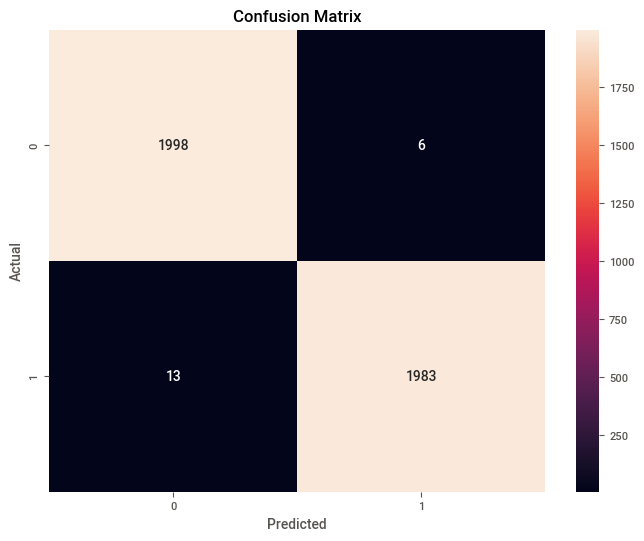

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2004
           1       1.00      0.99      1.00      1996

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



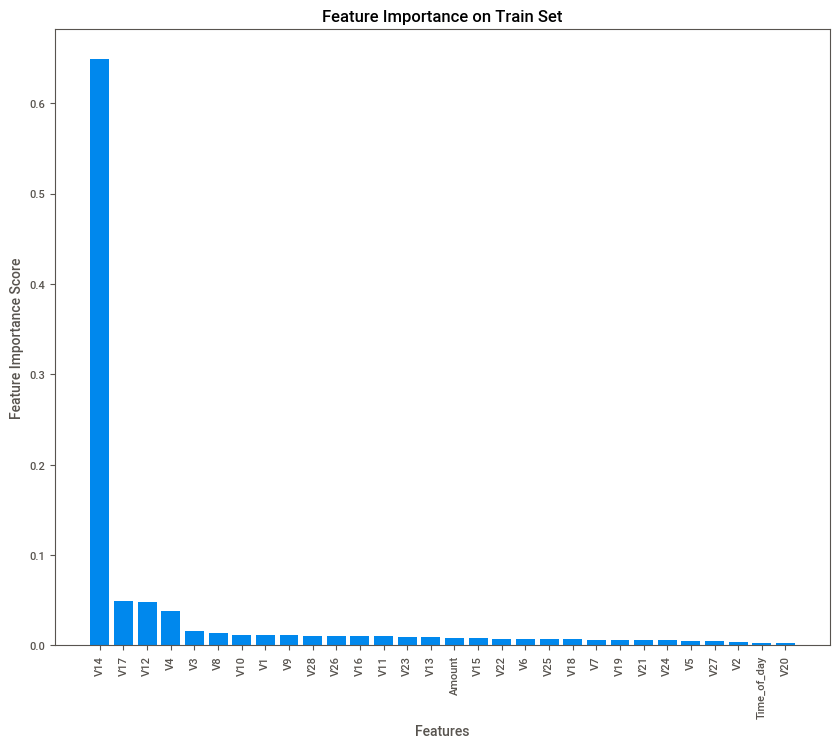

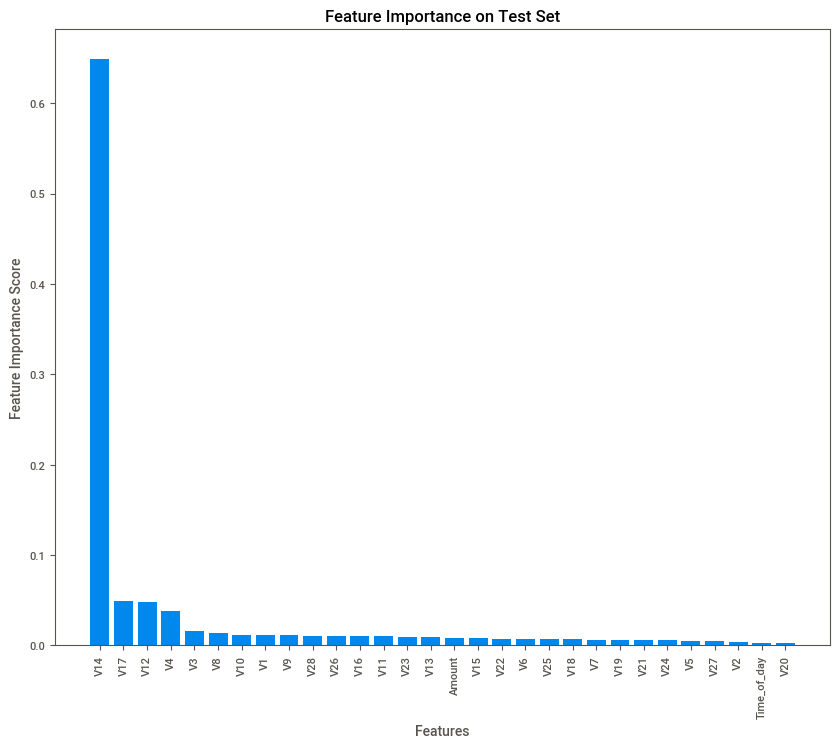

In [61]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Plot feature importance for the model on Train Set:
importances = xgb_classifier.feature_importances_
sorted_idx = importances.argsort()[::-1]
feature_names = X_train.columns

# Plot feature importance for the model on Test Set:
importances = xgb_classifier.feature_importances_
sorted_idx = importances.argsort()[::-1]
feature_names = X_test.columns

plt.figure(figsize=(10, 8))
plt.bar(range(X_train.shape[1]), importances[sorted_idx])
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Feature Importance on Train Set')
plt.show()

plt.figure(figsize=(10, 8))
plt.bar(range(X_test.shape[1]), importances[sorted_idx])
plt.xticks(range(X_test.shape[1]), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Feature Importance on Test Set')
plt.show()

# Applying Hyperparameter Tuning

Hyperparamenter Tuning

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Create a Grid Search object
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Get the best model from the Grid Search
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


# Model Performance Metrics and Features Importance

Accuracy: 0.99475


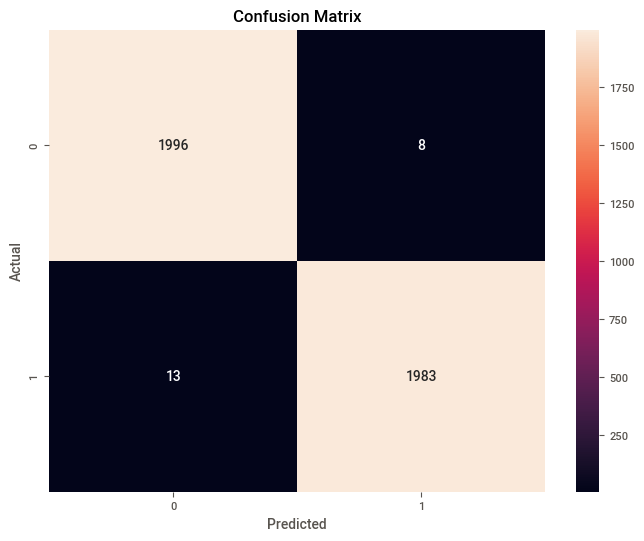

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2004
           1       1.00      0.99      0.99      1996

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



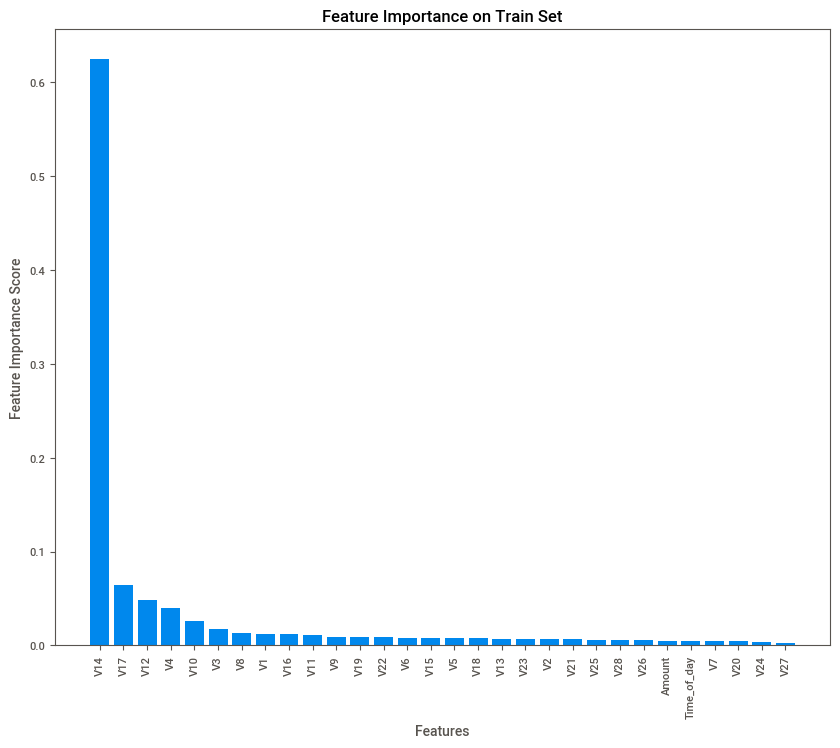

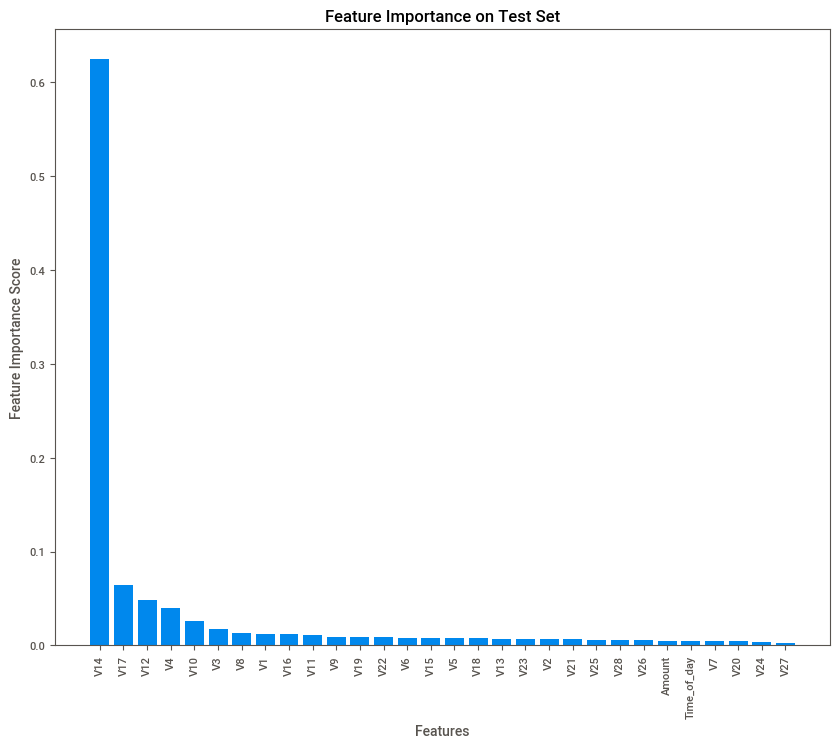

In [63]:
# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Set feature names for XGBoost (for the best_model)
best_model.get_booster().feature_names = list(X_train.columns)

# Plot feature importance for the best model on Train Set
importances = best_model.feature_importances_
sorted_idx = importances.argsort()[::-1]
feature_names = X_train.columns

# Plot feature importance for the best model on Test Set
importances = best_model.feature_importances_
sorted_idx = importances.argsort()[::-1]
feature_names = X_test.columns

plt.figure(figsize=(10, 8))
plt.bar(range(X_train.shape[1]), importances[sorted_idx])
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Feature Importance on Train Set')
plt.show()

plt.figure(figsize=(10, 8))
plt.bar(range(X_test.shape[1]), importances[sorted_idx])
plt.xticks(range(X_test.shape[1]), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Feature Importance on Test Set')
plt.show()

# Fraud Predictions: Actual Vs Predicted Classes with respective probabilities:

Safe Credit Card Transactions Predicted:

In [64]:
import numpy as np

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)

# Probability values
safe_probabilities = y_pred_prob[:, 1]

# Determine class predictions based on probability threshold (0.5 in this case)
predicted_classes = (safe_probabilities < 0.5).astype(int)

# Converting y_test to a numpy array to ensure compatibility
y_test = np.array(y_test)

# Find indices of transactions with probabilities less than or equal to 0.5 (safe class)
safe_indices = np.where(safe_probabilities <= 0.5)[0]

# Compare predicted classes with actual classes for transactions with probabilities <= 0.5 (safe class)
for idx in safe_indices[:15]:
    print(f"Actual Safe: {y_test[idx]}, Predicted: {predicted_classes[idx]}, Probability: {safe_probabilities[idx]:.4f}")

Actual Safe: 0, Predicted: 1, Probability: 0.0000
Actual Safe: 0, Predicted: 1, Probability: 0.0000
Actual Safe: 0, Predicted: 1, Probability: 0.0000
Actual Safe: 0, Predicted: 1, Probability: 0.0000
Actual Safe: 0, Predicted: 1, Probability: 0.0000
Actual Safe: 0, Predicted: 1, Probability: 0.0000
Actual Safe: 0, Predicted: 1, Probability: 0.0001
Actual Safe: 0, Predicted: 1, Probability: 0.0000
Actual Safe: 0, Predicted: 1, Probability: 0.0000
Actual Safe: 0, Predicted: 1, Probability: 0.0000
Actual Safe: 0, Predicted: 1, Probability: 0.0000
Actual Safe: 0, Predicted: 1, Probability: 0.0000
Actual Safe: 0, Predicted: 1, Probability: 0.0000
Actual Safe: 0, Predicted: 1, Probability: 0.0000
Actual Safe: 0, Predicted: 1, Probability: 0.0000


Fraudulent Credic Card Transations Predicted:

In [65]:
import numpy as np

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)

# Probability of the positive class (fraud)
fraud_probabilities = y_pred_prob[:, 1]

# Determine class predictions based on probability threshold (0.5 in this case)
predicted_classes = (fraud_probabilities > 0.5).astype(int)

# Converting y_test to a numpy array to ensure compatibility
y_test = np.array(y_test)

# Find indices of transactions with probabilities greater than 0.5 (fraud class)
fraud_indices = np.where(fraud_probabilities > 0.5)[0]

# Compare predicted classes with actual classes for transactions with probabilities > 0.5
for idx in fraud_indices[:15]:
    print(f"Actual Fraud: {y_test[idx]}, Predicted: {predicted_classes[idx]}, Probability: {fraud_probabilities[idx]:.4f}")


Actual Fraud: 1, Predicted: 1, Probability: 0.9678
Actual Fraud: 1, Predicted: 1, Probability: 1.0000
Actual Fraud: 1, Predicted: 1, Probability: 1.0000
Actual Fraud: 1, Predicted: 1, Probability: 1.0000
Actual Fraud: 1, Predicted: 1, Probability: 1.0000
Actual Fraud: 1, Predicted: 1, Probability: 1.0000
Actual Fraud: 1, Predicted: 1, Probability: 0.9952
Actual Fraud: 1, Predicted: 1, Probability: 1.0000
Actual Fraud: 1, Predicted: 1, Probability: 1.0000
Actual Fraud: 1, Predicted: 1, Probability: 1.0000
Actual Fraud: 1, Predicted: 1, Probability: 1.0000
Actual Fraud: 1, Predicted: 1, Probability: 0.9999
Actual Fraud: 1, Predicted: 1, Probability: 1.0000
Actual Fraud: 1, Predicted: 1, Probability: 1.0000
Actual Fraud: 1, Predicted: 1, Probability: 1.0000


# Final Model Performance Metrics

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

# From the Classification report:
class_rep = classification_report(y_test, y_pred, output_dict=True)

# Extracting relevant metrics
precision = class_rep['1']['precision']
recall = class_rep['1']['recall']
f1_score = class_rep['1']['f1-score']
accuracy = class_rep['accuracy']

# Metrics as per the Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print()
print('MODEL PERFORMANCE METRICS:\n')

# Creating a Function to interpret metrics
def interpret_metric(metric, threshold, metric_name):
    if metric > threshold:
        print(f"""
              {metric_name} ({metric:.2f}) is above {threshold * 100}%: making the model excellent in predicting nature of transactions!
              """
             )
    else:
        print(f"{metric_name} ({metric:.2f}) is below {threshold * 100}% - Needs improvement.")

# Defining a threshold (e.g., 0.75) for each metric
threshold = 0.75

# Interpretation of precision
interpret_metric(precision, threshold, "Precision")

# Interpretation of recall
interpret_metric(recall, threshold, "Recall")

# Interpretation of F1-score
interpret_metric(f1_score, threshold, "F1-Score")

# Interpretation of model accuracy
if accuracy > threshold:
    print(f"Model accuracy of: ({accuracy:.2f}) is above {threshold * 100}%, meaning that the Model is performing well.")
else:
    print(f"Model accuracy ({accuracy:.2f}) is below {threshold * 100}%, Model accuracy should be improved.")

# Summary statement about model performance
if tp > 0:
    print("""
          The model correctly identifies fraudulent transactions (True Positives) as demonstrated by
          high precision.
          """
         )
else:
    print("The model does not identify any fraudulent transactions (True Positives) - Further improvement is needed.")


MODEL PERFORMANCE METRICS:


              Precision (1.00) is above 75.0%: making the model excellent in predicting nature of transactions!
              

              Recall (0.99) is above 75.0%: making the model excellent in predicting nature of transactions!
              

              F1-Score (0.99) is above 75.0%: making the model excellent in predicting nature of transactions!
              
Model accuracy of: (0.99) is above 75.0%, meaning that the Model is performing well.

          The model correctly identifies fraudulent transactions (True Positives) as demonstrated by
          high precision.
          


# Model Metrics Interpretation Summary

Precision:
Precision metric assesses how correctly the model is picking positive predictions by the model as a proportion of true positive predictions out of all positive predictions made by the model. In the context of fraud detection with credit cards, high precision indicates that when the model predicts a transaction as fraudulent, it is highly likely to be correct. A high precision means fewer false alarms, which is important to prevent inconveniencing legitimate customers with false fraud alerts.

Recall:
Recall is a measure of sensitivity or true positive rate, evaluating the model's ability to identify actual positive cases. It measures the proportion of true positive predictions relative to all actual positive cases. In the context of fraud detection, high recall means the model is good at capturing most of the fraudulent transactions, minimizing the number of fraud cases that go undetected. High recall is essential to ensure that fraudulent activities are not missed.

F1-Score:
The F1-Score is a balance between precision and recall. It provides a single value that combines both metrics into a single measure of a model's overall effectiveness predicting correctly. The F1-Score is particularly useful when precision and recall have different priorities. A high F1-Score indicates that the model has both a low rate of false alarms (high precision) and captures a significant proportion of actual fraud cases (high recall). In fraud detection, a high F1-Score signifies a robust model that performs well in balancing precision and recall, making it reliable for identifying fraudulent transactions.

A high F1-Score eliminates the need to choose between emphasizing precision or recall; it indicates that the model is performing well in terms of correctly identifying fraudulent transactions without excessively generating false positives.

In summary, high figures in precision, recall, and the F1-Score are indicative of a well-performing fraud detection model.